In [1]:
#importing basic packages for data understanding and numerical package for math operations
import pandas as pd
import numpy as np

                                    
import matplotlib.pyplot as plt     ##importing required packages for visulization and plotting 
%matplotlib inline 
                
import datetime as dt              #package required for DATE/TIME

import seaborn as sns            #set seabor graphs to a better style
sns.set(style="ticks")
sns.set_style("darkgrid")

import pandas_profiling as pf            #importing package for data auditing

from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.formula.api as smf

import scipy.stats as stats  #scientific python

from sklearn import datasets  
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

pd.pandas.set_option('display.max_columns',None)             #it will show all the columns
#pd.pandas.set_option('display.max_rows',None)               #it will show all the rows
import os # os.chdir(path link)                              #importing package to execute operating system functions
import re

import math

# Supress Warnings\
import warnings
warnings.filterwarnings('ignore')

**Data has been provided for the period of Sep 2016 to Oct 2018**

# cust

In [2]:
customer=pd.read_csv(r"C:\Users\putta\Desktop\PYTHON\Case Study 6 -End to End Case Study E-Commerce Analytics Project\CUSTOMERS.csv")
print(customer.shape)
customer.head(3)

(99441, 5)


,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,Adilabad,Andhra Pradesh
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,Adoni,Andhra Pradesh
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,Akkarampalle,Andhra Pradesh


# glocation

In [3]:
glocation=pd.read_csv(r"C:\Users\putta\Desktop\PYTHON\Case Study 6 -End to End Case Study E-Commerce Analytics Project\GEO_LOCATION.csv")
print(glocation.shape)
glocation.head(3)

(19015, 5)


,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,Akkarampalle,Andhra Pradesh
1,1046,-23.546081,-46.644820,Akkarampalle,Andhra Pradesh
2,1041,-23.544392,-46.639499,Akkarampalle,Andhra Pradesh


# orderitems

In [4]:
orderitems=pd.read_csv(r"C:\Users\putta\Desktop\PYTHON\Case Study 6 -End to End Case Study E-Commerce Analytics Project\ORDER_ITEMS.csv")
print(orderitems.shape)
orderitems.head(3)

(112650, 7)


,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,9/19/2017 9:45,58.9,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,5/3/2017 11:05,239.9,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,1/18/2018 14:48,199.0,17.87


# order_payments

In [5]:
order_payments=pd.read_csv(r"C:\Users\putta\Desktop\PYTHON\Case Study 6 -End to End Case Study E-Commerce Analytics Project\ORDER_PAYMENTS.csv")
print(order_payments.shape)
order_payments.head(3)

(103886, 5)


,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71


# o_review_rating

In [6]:
o_review_rating=pd.read_csv(r"C:\Users\putta\Desktop\PYTHON\Case Study 6 -End to End Case Study E-Commerce Analytics Project\ORDER_REVIEW_RATINGS.csv")
print(o_review_rating.shape)
o_review_rating.head(3)

(100000, 5)


,review_id,order_id,review_score,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,1/18/2018 0:00,1/18/2018 21:46
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,3/10/2018 0:00,3/11/2018 3:05
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,2/17/2018 0:00,2/18/2018 14:36


# orders

In [7]:
orders=pd.read_csv(r"C:\Users\putta\Desktop\PYTHON\Case Study 6 -End to End Case Study E-Commerce Analytics Project\ORDERS.csv")
print(orders.shape)
orders.head(3)

(99441, 8)


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,10/2/2017 10:56,10/2/2017 11:07,10/4/2017 19:55,10/10/2017 21:25,10/18/2017 0:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,7/24/2018 20:41,7/26/2018 3:24,7/26/2018 14:31,8/7/2018 15:27,8/13/2018 0:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,8/8/2018 8:38,8/8/2018 8:55,8/8/2018 13:50,8/17/2018 18:06,9/4/2018 0:00


# products

In [8]:
products=pd.read_csv(r"C:\Users\putta\Desktop\PYTHON\Case Study 6 -End to End Case Study E-Commerce Analytics Project\PRODUCTS.csv")
print(products.shape)
products.head(3)

(32951, 9)


,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,Perfumery,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,Art,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,Sports_Leisure,46.0,250.0,1.0,154.0,18.0,9.0,15.0


# sellers

In [9]:
sellers=pd.read_csv(r"C:\Users\putta\Desktop\PYTHON\Case Study 6 -End to End Case Study E-Commerce Analytics Project\SELLERS.csv")
print(sellers.shape)
sellers.head(3)

(3095, 4)


,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,Alwal,Andhra Pradesh
1,d1b65fc7debc3361ea86b5f14c68d2e2,13023,Alwal,Andhra Pradesh
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,Badepalle,Andhra Pradesh


In [10]:
#df.sample(5000)

In [11]:
a=pd.merge(orderitems, orders, left_on='order_id', right_on='order_id', how='left' )
b=pd.merge(a, products, left_on='product_id', right_on='product_id', how='left' )
c=pd.merge(b, order_payments, left_on='order_id', right_on='order_id', how='left' )
d=pd.merge(c,o_review_rating, left_on='order_id', right_on='order_id', how='left' )
e=pd.merge(d,sellers, left_on='seller_id', right_on='seller_id', how='left' )
f=pd.merge(e,glocation, left_on='seller_zip_code_prefix', right_on='geolocation_zip_code_prefix', how='left' )
df=pd.merge(customer,f, left_on='customer_id', right_on='customer_id', how='left')

#  Step 1: Model Building Steps - Pre-Modeling Stage

###  Inspecting the various aspects of the dataframe

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 119093 entries, 0 to 119092
Data columns (total 42 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   customer_id                    119093 non-null  object 
 1   customer_unique_id             119093 non-null  object 
 2   customer_zip_code_prefix       119093 non-null  int64  
 3   customer_city                  119093 non-null  object 
 4   customer_state                 119093 non-null  object 
 5   order_id                       118318 non-null  object 
 6   order_item_id                  118318 non-null  float64
 7   product_id                     118318 non-null  object 
 8   seller_id                      118318 non-null  object 
 9   shipping_limit_date            118318 non-null  object 
 10  price                          118318 non-null  float64
 11  freight_value                  118318 non-null  float64
 12  order_status                  

# Understanding  the data availability

In [13]:
df

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_creation_date,review_answer_timestamp,seller_zip_code_prefix,seller_city,seller_state,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,Adilabad,Andhra Pradesh,00e7ee1b050b8499577073aeb2a297a1,1.0,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,5/22/2017 15:22,124.99,21.88,delivered,5/16/2017 15:05,5/16/2017 15:22,5/23/2017 10:47,5/25/2017 10:35,6/5/2017 0:00,Office_Furniture,41.0,1141.0,1.0,8683.0,54.0,64.0,31.0,1.0,credit_card,2.0,146.87,88b8b52d46df026a9d1ad2136a59b30b,4.0,5/26/2017 0:00,5/30/2017 22:34,8577.0,Vijayawada,Andhra Pradesh,8577.0,-23.482623,-46.374490,Vijayawada,Andhra Pradesh
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,Adoni,Andhra Pradesh,29150127e6685892b6eab3eec79f59c7,1.0,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,1/18/2018 20:58,289.00,46.48,delivered,1/12/2018 20:48,1/12/2018 20:58,1/15/2018 17:14,1/29/2018 12:41,2/6/2018 0:00,Housewares,43.0,1002.0,3.0,10150.0,89.0,15.0,40.0,1.0,credit_card,8.0,335.48,02fc48a9efa3e3d0f1a8ea26507eeec3,5.0,1/30/2018 0:00,2/10/2018 22:43,88303.0,Sadasivpet,Andhra Pradesh,88303.0,-26.912429,-48.677381,Sadasivpet,Andhra Pradesh
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,Akkarampalle,Andhra Pradesh,b2059ed67ce144a36e2aa97d2c9e9ad2,1.0,bd07b66896d6f1494f5b86251848ced7,7c67e1448b00f6e969d365cea6b010ab,6/5/2018 16:19,139.94,17.79,delivered,5/19/2018 16:07,5/20/2018 16:19,6/11/2018 14:31,6/14/2018 17:58,6/13/2018 0:00,Office_Furniture,55.0,955.0,1.0,8267.0,52.0,52.0,17.0,1.0,credit_card,7.0,157.73,5ad6695d76ee186dc473c42706984d87,5.0,6/15/2018 0:00,6/15/2018 12:10,8577.0,Vijayawada,Andhra Pradesh,8577.0,-23.482623,-46.374490,Vijayawada,Andhra Pradesh
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,Akkayapalle,Andhra Pradesh,951670f92359f4fe4a63112aa7306eba,1.0,a5647c44af977b148e0a3a4751a09e2e,7c67e1448b00f6e969d365cea6b010ab,3/27/2018 16:31,149.94,23.36,delivered,3/13/2018 16:06,3/13/2018 17:29,3/27/2018 23:22,3/28/2018 16:04,4/10/2018 0:00,Office_Furniture,48.0,1066.0,1.0,12160.0,56.0,51.0,28.0,1.0,credit_card,1.0,173.30,059a801bb31f6aab2266e672cab87bc5,5.0,3/29/2018 0:00,4/2/2018 18:36,8577.0,Vijayawada,Andhra Pradesh,8577.0,-23.482623,-46.374490,Vijayawada,Andhra Pradesh
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,Alwal,Andhra Pradesh,6b7d50bd145f6fc7f33cebabd7e49d0f,1.0,9391a573abe00141c56e38d84d7d5b3b,4a3ca9315b744ce9f8e9374361493884,7/31/2018 10:10,230.00,22.25,delivered,7/29/2018 9:51,7/29/2018 10:10,7/30/2018 15:16,8/9/2018 20:55,8/15/2018 0:00,Home_Confort,61.0,407.0,1.0,5200.0,45.0,15.0,35.0,1.0,credit_card,8.0,252.25,8490879d58d6c5d7773f2739a03f089a,5.0,8/10/2018 0:00,8/17/2018 1:59,14940.0,Tarsali,Gujarat,14940.0,-21.766477,-48.831547,Tarsali,Gujarat
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119088,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,Akkarampalle,Andhra Pradesh,6760e20addcf0121e9d58f2f1ff14298,1.0,ccb4503d9d43d245d3b295d0544f988b,527801b552d0077ffd170872eb49683b,4/12/2018 16:08,74.90,13.88,delivered,4/7/2018 15:48,4/7/2018 16:08,4/11/2018 2:08,4/13/2018 20:06,4/25/2018 0:00,Book

In [14]:
df.head(3)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_creation_date,review_answer_timestamp,seller_zip_code_prefix,seller_city,seller_state,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,Adilabad,Andhra Pradesh,00e7ee1b050b8499577073aeb2a297a1,1.0,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,5/22/2017 15:22,124.99,21.88,delivered,5/16/2017 15:05,5/16/2017 15:22,5/23/2017 10:47,5/25/2017 10:35,6/5/2017 0:00,Office_Furniture,41.0,1141.0,1.0,8683.0,54.0,64.0,31.0,1.0,credit_card,2.0,146.87,88b8b52d46df026a9d1ad2136a59b30b,4.0,5/26/2017 0:00,5/30/2017 22:34,8577.0,Vijayawada,Andhra Pradesh,8577.0,-23.482623,-46.374490,Vijayawada,Andhra Pradesh
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,Adoni,Andhra Pradesh,29150127e6685892b6eab3eec79f59c7,1.0,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,1/18/2018 20:58,289.00,46.48,delivered,1/12/2018 20:48,1/12/2018 20:58,1/15/2018 17:14,1/29/2018 12:41,2/6/2018 0:00,Housewares,43.0,1002.0,3.0,10150.0,89.0,15.0,40.0,1.0,credit_card,8.0,335.48,02fc48a9efa3e3d0f1a8ea26507eeec3,5.0,1/30/2018 0:00,2/10/2018 22:43,88303.0,Sadasivpet,Andhra Pradesh,88303.0,-26.912429,-48.677381,Sadasivpet,Andhra Pradesh
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,Akkarampalle,Andhra Pradesh,b2059ed67ce144a36e2aa97d2c9e9ad2,1.0,bd07b66896d6f1494f5b86251848ced7,7c67e1448b00f6e969d365cea6b010ab,6/5/2018 16:19,139.94,17.79,delivered,5/19/2018 16:07,5/20/2018 16:19,6/11/2018 14:31,6/14/2018 17:58,6/13/2018 0:00,Office_Furniture,55.0,955.0,1.0,8267.0,52.0,52.0,17.0,1.0,credit_card,7.0,157.73,5ad6695d76ee186dc473c42706984d87,5.0,6/15/2018 0:00,6/15/2018 12:10,8577.0,Vijayawada,Andhra Pradesh,8577.0,-23.482623,-46.374490,Vijayawada,Andhra Pradesh


In [15]:
df.columns

Index(['customer_id', 'customer_unique_id', 'customer_zip_code_prefix',
       'customer_city', 'customer_state', 'order_id', 'order_item_id',
       'product_id', 'seller_id', 'shipping_limit_date', 'price',
       'freight_value', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date',
       'product_category_name', 'product_name_lenght',
       'product_description_lenght', 'product_photos_qty', 'product_weight_g',
       'product_length_cm', 'product_height_cm', 'product_width_cm',
       'payment_sequential', 'payment_type', 'payment_installments',
       'payment_value', 'review_id', 'review_score', 'review_creation_date',
       'review_answer_timestamp', 'seller_zip_code_prefix', 'seller_city',
       'seller_state', 'geolocation_zip_code_prefix', 'geolocation_lat',
       'geolocation_lng', 'geolocation_city', 'geolocation_state'],
      dtype='object')

In [16]:
df.size

5001906

In [17]:
df.shape

(119093, 42)

In [18]:
df.columns.value_counts().count()

42

In [19]:
df.isna().sum()

customer_id                         0
customer_unique_id                  0
customer_zip_code_prefix            0
customer_city                       0
customer_state                      0
order_id                          775
order_item_id                     775
product_id                        775
seller_id                         775
shipping_limit_date               775
price                             775
freight_value                     775
order_status                      775
order_purchase_timestamp          775
order_approved_at                 790
order_delivered_carrier_date     2029
order_delivered_customer_date    3363
order_estimated_delivery_date     775
product_category_name            2509
product_name_lenght              2484
product_description_lenght       2484
product_photos_qty               2484
product_weight_g                  795
product_length_cm                 795
product_height_cm                 795
product_width_cm                  795
payment_sequ

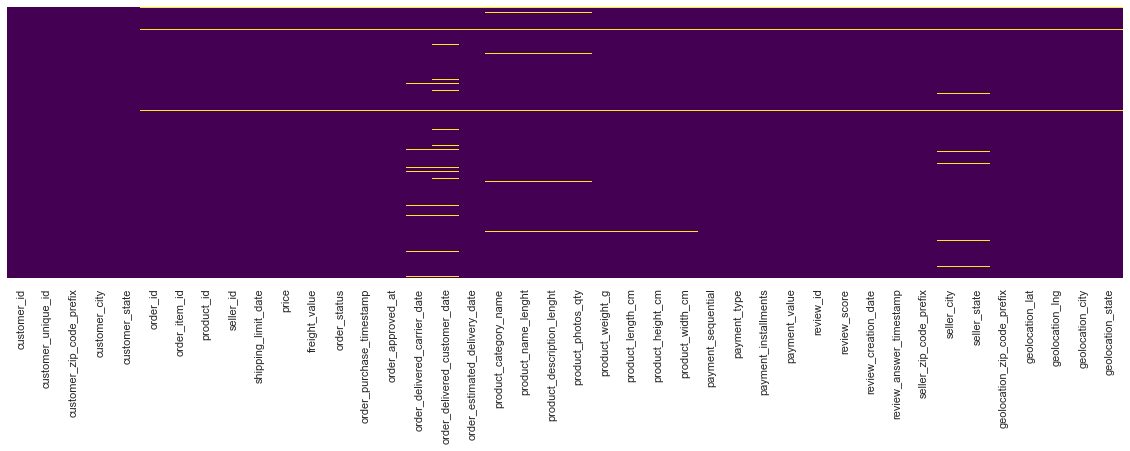

In [20]:
plt.figure(figsize=(20,5))
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')
plt.show()

### Handlign missing values (Imputation of Missing values)

In [21]:
def missing_treat(x):
    if x.dtype == 'O':
        x[x=='unknown'] = np.nan
        if x.isna().mean()<0.2:
            x = x.fillna(x.mode()[0])  # step replaced by knn imputation
    else:
        x[x==999] = np.nan
        if x.isna().mean()<0.2:
            x = x.fillna(x.median())   # step replaced by knn imputation
    return x

In [22]:
df=df.apply(missing_treat)

In [23]:
df.isna().sum()

customer_id                      0
customer_unique_id               0
customer_zip_code_prefix         0
customer_city                    0
customer_state                   0
order_id                         0
order_item_id                    0
product_id                       0
seller_id                        0
shipping_limit_date              0
price                            0
freight_value                    0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
product_category_name            0
product_name_lenght              0
product_description_lenght       0
product_photos_qty               0
product_weight_g                 0
product_length_cm                0
product_height_cm                0
product_width_cm                 0
payment_sequential               0
payment_type                     0
payment_installments

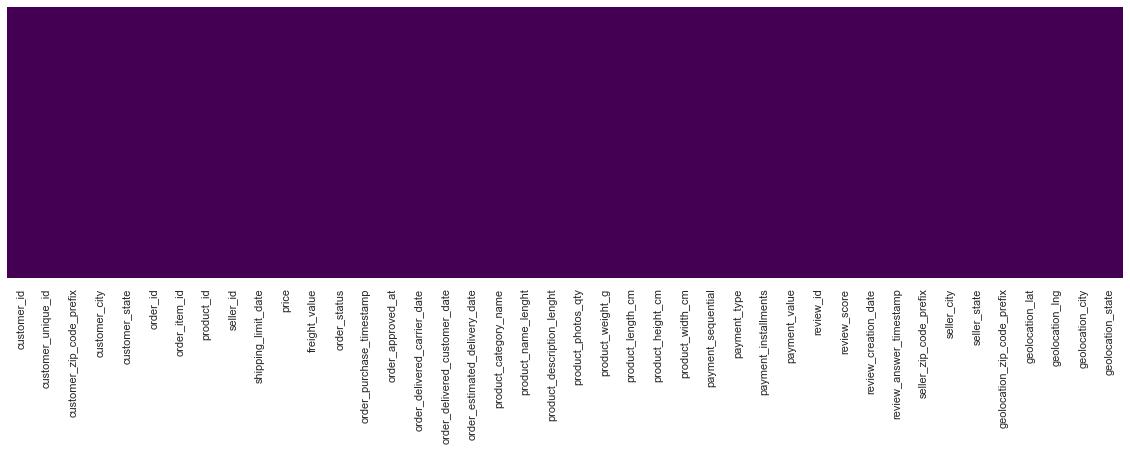

In [24]:
plt.figure(figsize=(20,5))
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')
plt.show()

In [25]:
df['shipping_limit_date']=pd.to_datetime(df['shipping_limit_date'])
df['order_purchase_timestamp']=pd.to_datetime(df['order_purchase_timestamp'])
df['order_approved_at']=pd.to_datetime(df['order_approved_at'])
df['order_delivered_carrier_date']=pd.to_datetime(df['order_delivered_carrier_date'])
df['order_delivered_customer_date']=pd.to_datetime(df['order_delivered_customer_date'])
df['order_estimated_delivery_date']=pd.to_datetime(df['order_estimated_delivery_date'])
df['review_creation_date']=pd.to_datetime(df['review_creation_date'])
df['review_answer_timestamp']=pd.to_datetime(df['review_answer_timestamp'])

# Value counts

In [26]:
 for col in df.select_dtypes(include='object').columns:
     print("\n" + col)
     print(df[col].value_counts())


customer_id
270c23a11d024a44c896d1894b261a83    63
13aa59158da63ba0e93ec6ac2c07aacb    38
9af2372a1e49340278e7c1ef8d749f34    29
92cd3ec6e2d643d4ebd0e3d6238f69e2    26
86cc80fef09f7f39df4b0dbce48e81cb    24
                                    ..
9024b6b926dff086c50dfd85762b9a45     1
df61d60f81e02f1c9360b1dce03778f1     1
8bf326e22c694e7dd390b005a6560b88     1
3cf477126a8dd7140cba273f6f65e61b     1
274fa6071e5e17fe303b9748641082c8     1
Name: customer_id, Length: 99441, dtype: int64

customer_unique_id
9a736b248f67d166d2fbb006bcb877c3    75
6fbc7cdadbb522125f4b27ae9dee4060    38
f9ae226291893fda10af7965268fb7f6    35
8af7ac63b2efbcbd88e5b11505e8098a    29
569aa12b73b5f7edeaa6f2a01603e381    26
                                    ..
89e8aa7dce19d96740b7004ff7a92b87     1
5e809f39163aadeda694b51606b02d49     1
368ad1cd5eb8e06bb9b4cae407bb4bf2     1
302c1a15f1ada723f22801b30293cde3     1
84732c5050c01db9b23e19ba39899398     1
Name: customer_unique_id, Length: 96096, dtype: int64

custome

# Univariate Analysis

In [27]:
df.describe(include=['int64','float64'])

,customer_zip_code_prefix,order_item_id,price,freight_value,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,payment_sequential,payment_installments,payment_value,review_score,seller_zip_code_prefix,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng
count,119093.000000,119093.000000,119093.000000,119093.000000,119093.000000,119093.000000,119093.000000,119093.000000,119093.000000,119093.000000,119093.000000,119093.000000,119093.000000,119093.000000,119093.000000,119093.000000,119093.000000,119093.000000,119093.000000
mean,35035.571637,1.195251,120.227244,20.008167,48.834827,781.596206,2.179977,2102.875039,30.229720,16.595828,23.054369,1.093448,2.937335,172.155104,4.020891,24478.779903,24451.461337,-22.815846,-47.241181
std,29823.700050,0.697367,183.262474,15.787830,9.939077,646.263565,1.708117,3775.765683,16.140562,13.412030,11.712611,0.726211,2.769976,266.281274,1.397934,27602.193083,27574.320856,2.664755,2.319876
min,1003.000000,1.000000,0.850000,0.000000,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000,1.000000,0.000000,0.000000,1.000000,1001.000000,1001.000000,-36.605374,-67.809656
25%,11250.000000,1.000000,39.900000,13.080000,43.000000,348.000000,1.000000,300.000000,18.000000,8.000000,15.000000,1.000000,1.000000,61.060000,4.000000,6506.000000,6513.000000,-23.606332,-48.831547
50%,24240.000000,1.000000,74.900000,16.280000,52.000000,600.000000,1.000000,700.000000,25.000000,13.000000,20.000000,1.000000,2.000000,108.200000,5.000000,13660.000000,13660.000000,-23.422313,-46.755211
75%,58489.000000,1.000000,132.700000,21.150000,57.000000,967.000000,3.000000,1800.000000,38.000000,20.000000,30.000000,1.000000,4.000000,188.630000,5.000000,27930.000000,27277.000000,-21.766477,-46.518082
max,99990.000000,21.000000,6735.000000,409.680000,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000,29.000000,24.000000,13664.080000,5.000000,99730.000000,99730.000000,-2.546079,-34.847856


In [28]:
df.describe(include=['object'])

,customer_id,customer_unique_id,customer_city,customer_state,order_id,product_id,seller_id,order_status,product_category_name,payment_type,review_id,seller_city,seller_state,geolocation_city,geolocation_state
count,119093,119093,119093,119093,119093,119093,119093,119093,119093,119093,119093,119093,119093,119093,119093
unique,99441,96096,4119,20,98666,32951,3095,7,71,4,98453,534,19,529,19
top,270c23a11d024a44c896d1894b261a83,9a736b248f67d166d2fbb006bcb877c3,Akkarampalle,Andhra Pradesh,895ab968e7bb0d5659d16cd74cd1650c,aca2eb7d00ea1a7b8ebd4e68314663af,4a3ca9315b744ce9f8e9374361493884,delivered,Bed_Bath_Table,credit_card,eef5dbca8d37dfce6db7d7b16dd0525e,Akkarampalle,Andhra Pradesh,Akkarampalle,Andhra Pradesh
freq,63,75,18866,73273,838,1311,2930,116506,14499,88044,838,31793,82376,35391,83065


In [29]:
def uni_variate_analysis(x):
    if x.dtype == 'O':
        cnt = x.count()
        no_unique=x.nunique()  #no.of unique values
        mode = x.mode()[0]
        freq=x.value_counts()[0]
        nmiss = x.isna().sum()
        nmiss_pct = round(nmiss/cnt,2)*100
        return pd.Series([cnt,no_unique,mode,freq,nmiss, nmiss_pct,], index = ['count','no_unique','Mode','freq','N_Miss','Miss_pct'])
    elif ((x.dtype == 'float') | (x.dtype == 'int')):
        cnt = x.count()
        nmiss = x.isna().sum()
        nmiss_pct = x.isna().mean()
        s = x.sum()
        avg = x.mean()
        med = x.median()
        var = x.var()
        st = x.std()
        r = x.max() - x.min()
        cv = x.std()/x.mean()
        min_x = x.min()
        p1 = x.quantile(0.01)
        p5 = x.quantile(0.05)
        p10 = x.quantile(0.10)
        p25 = x.quantile(0.25)
        p50 = x.quantile(0.50)
        p75 = x.quantile(0.75)
        p90 = x.quantile(0.90)
        p95 = x.quantile(0.95)
        p99 = x.quantile(0.99)
        max_x = x.max()
        return pd.Series([cnt, nmiss, nmiss_pct, s, avg, med, var, st, r, cv, min_x, p1, p5, p10, p25, p50, p75, p90, p95, p99, max_x ],
                        index = ['count', 'N_Miss', 'Miss_pct', 'Sum', 'Mean', 'Median', 'Variance','Std', 'Range', 'CV', 'Min', 'P1', 'P5', 'P10', 'P25', 'P50', 'P75', 'P90', 'P95', 'P99', 'Max'])

In [30]:
df.apply(uni_variate_analysis)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_creation_date,review_answer_timestamp,seller_zip_code_prefix,seller_city,seller_state,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
CV,NaN,NaN,None,NaN,NaN,NaN,0.583448,NaN,NaN,None,1.524301e+00,7.890692e-01,NaN,None,None,None,None,None,NaN,2.035244e-01,8.268509e-01,0.783548,1.795525e+00,5.339302e-01,8.081567e-01,5.080430e-01,0.664148,NaN,0.943024,1.546752e+00,NaN,0.347668,None,None,1.127597e+00,NaN,NaN,1.127717e+00,-1.167941e-01,-4.910708e-02,NaN,NaN
Max,NaN,NaN,None,NaN,NaN,NaN,21.000000,NaN,NaN,None,6.735000e+03,4.096800e+02,NaN,None,None,None,None,None,NaN,7.600000e+01,3.992000e+03,20.000000,4.042500e+04,1.050000e+02,1.050000e+02,1.180000e+02,29.000000,NaN,24.000000,1.366408e+04,NaN,5.000000,None,None,9.973000e+04,NaN,NaN,9.973000e+04,-2.546079e+00,-3.484786e+01,NaN,NaN
Mean,NaN,NaN,None,NaN,NaN,NaN,1.195251,NaN,NaN,None,1.202272e+02,2.000817e+01,NaN,None,None,None,None,None,NaN,4.883483e+01,7.815962e+02,2.179977,2.102875e+03,3.022972e+01,1.659583e+01,2.305437e+01,1.093448,NaN,2.937335,1.721551e+02,NaN,4.020891,None,None,2.447878e+04,NaN,NaN,2.445146e+04,-2.281585e+01,-4.724118e+01,NaN,NaN
Median,NaN,NaN,None,NaN,NaN,NaN,1.000000,NaN,NaN,None,7.490000e+01,1.628000e+01,NaN,None,None,None,None,None,NaN,5.200000e+01,6.000000e+02,1.000000,7.000000e+02,2.500000e+01,1.300000e+01,2.000000e+01,1.000000,NaN,2.000000,1.082000e+02,NaN,5.000000,None,None,1.366000e+04,NaN,NaN,1.366000e+04,-2.342231e+01,-4.675521e+01,NaN,NaN
Min,NaN,NaN,None,NaN,NaN,NaN,1.000000,NaN,NaN,None,8.500000e-01,0.000000e+00,NaN,None,None,None,None,None,NaN,5.000000e+00,4.000000e+00,1.000000,0.000000e+00,7.000000e+00,2.000000e+00,6.000000e+00,1.000000,NaN,0.000000,0.000000e+00,NaN,1.000000,None,None,1.001000e+03,NaN,NaN,1.001000e+03,-3.660537e+01,-6.780966e+01,NaN,NaN
Miss_pct,0.0,0.0,None,0.0,0.0,0.0,0.000000,0.0,0.0,None,0.000000e+00,0.000000e+00,0.0,None,None,None,None,None,0.0,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.0,0.000000,0.000000e+00,0.0,0.000000,None,None,0.000000e+00,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0
Mode,270c23a11d024a44c896d1894b261a83,9a736b248f67d166d2fbb006bcb877c3,None,Akkarampalle,Andhra Pradesh,895ab968e7bb0d5659d16cd74cd1650c,NaN,aca2eb7d00ea1a7b8ebd4e68314663af,4a3ca9315b744ce9f8e9374361493884,None,NaN,NaN,delivered,None,None,None,None,None,Bed_Bath_Table,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,credit_card,NaN,NaN,eef5dbca8d37dfce6db7d7b16dd0525e,NaN,None,None,NaN,Akkarampalle,Andhra Pradesh,NaN,NaN,NaN,Akkarampalle,Andhra Pradesh
N_Miss,0,0,None,0,0,0,0.000000,0,0,None,0.000000e+00,0.000000e+00,0,None,None,None,None,None,0,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0,0.000000,0.000000e+00,0,0.000000,None,None,0.000000e+00,0,0,0.000000e+00,0.000000e+00,0.000000e+00,0,0
P1,NaN,NaN,None,NaN,NaN,NaN,1.000000,NaN,NaN,None,9.990000e+00,4.499200e+00,NaN,None,None,None,None,None,NaN,2.100000e+01,8.600000e+01,1.000000,7.500000e+01,1.600000e+01,2.000000e+00,1.100000e+01,1.000000,NaN,1.000000,7.409200e+00,NaN,1.000000,None,None,1.212000e+03,NaN,NaN,1.212000e+03,-2.991467e+01,-5.345817e+01,NaN,NaN
P10,NaN,NaN,None,NaN,NaN,NaN,1.000000,NaN,NaN,None,2.390000e+01,8.800000e+00,NaN,None,None,None,None,None,NaN,3.400000e+01,2.160000e+02,1.000000,1.550000e+02,1.600000e+01,4.000000e+00,1.200000e+01,1.000000,NaN,1.000000,3.668000e

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 119093 entries, 0 to 119092
Data columns (total 42 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   customer_id                    119093 non-null  object        
 1   customer_unique_id             119093 non-null  object        
 2   customer_zip_code_prefix       119093 non-null  int64         
 3   customer_city                  119093 non-null  object        
 4   customer_state                 119093 non-null  object        
 5   order_id                       119093 non-null  object        
 6   order_item_id                  119093 non-null  float64       
 7   product_id                     119093 non-null  object        
 8   seller_id                      119093 non-null  object        
 9   shipping_limit_date            119093 non-null  datetime64[ns]
 10  price                          119093 non-null  float64       
 11  

# Understand Distribution of data  

### Histogram/Boxplot for continuous

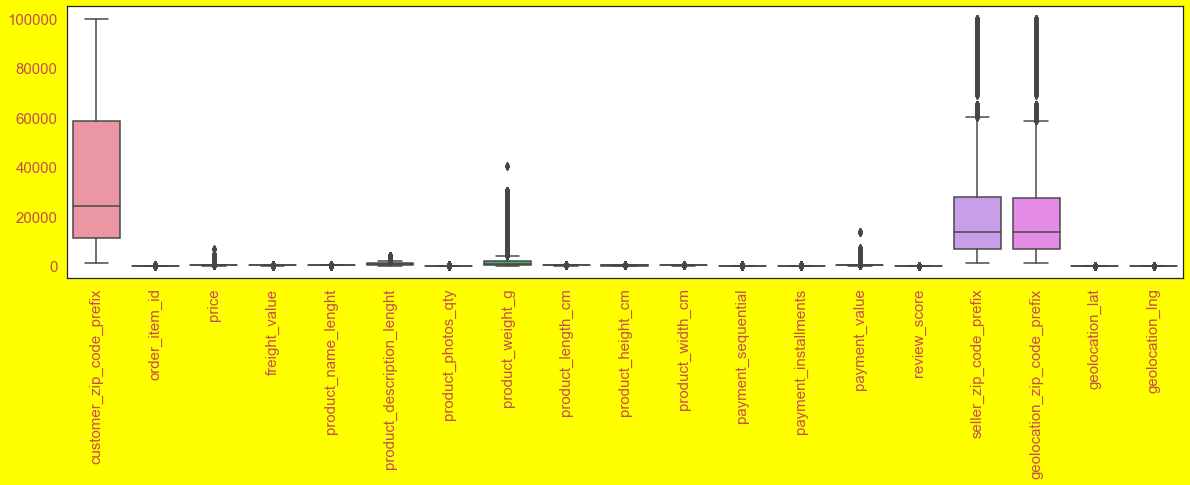

In [32]:
plt.figure(figsize=(20,5),facecolor='yellow')
sns.set(style='white')
sns.boxplot(data=df.select_dtypes(include=[int,float]))
plt.xticks(rotation=90,fontsize=15,color='r')
plt.yticks(rotation=0,fontsize=15,color='r')
plt.show()

### Understand Relationships (correlations/associations) 

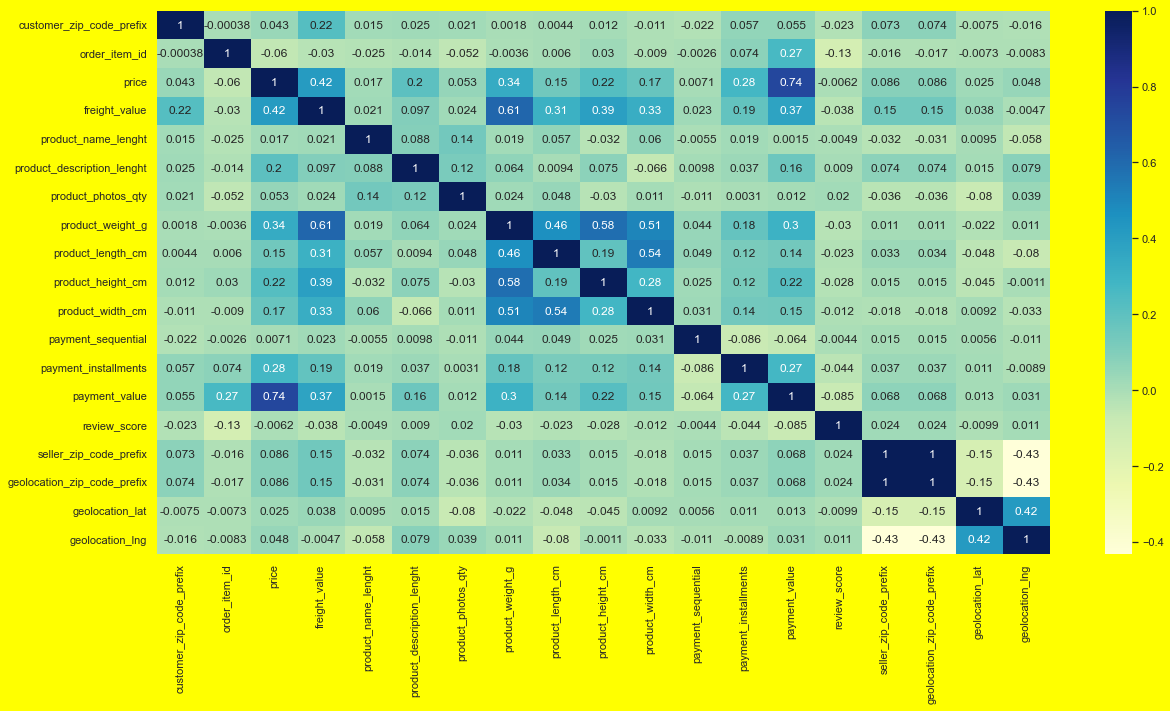

In [33]:
plt.figure(figsize=(20,10),facecolor='yellow')
sns.set(style='white')
sns.heatmap(df.corr(), cmap="YlGnBu", annot = True)
plt.show()

In [34]:
report = pf.ProfileReport(df)

In [35]:
#report.to_file("report.html")

# Step 2: Model Building Steps - Modeling Stage

### Handling Outliers--Cross sectional data

In [36]:
def outliers(x):
    if ((x.dtype=='int')| (x.dtype=='float')):
        Q1=x.quantile(0.25)
        Q3=x.quantile(0.75)
        IQR=Q3-Q1
        x=x.clip(lower=Q1-1.5*IQR,upper=Q3+1.5*IQR)                                      
    else :
        x
    return x

In [37]:
df=df.apply(outliers)
df.head(5)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_creation_date,review_answer_timestamp,seller_zip_code_prefix,seller_city,seller_state,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,Adilabad,Andhra Pradesh,00e7ee1b050b8499577073aeb2a297a1,1.0,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2017-05-22 15:22:00,124.99,21.880,delivered,2017-05-16 15:05:00,2017-05-16 15:22:00,2017-05-23 10:47:00,2017-05-25 10:35:00,2017-06-05,Office_Furniture,41.0,1141.0,1.0,4050.0,54.0,38.0,31.0,1.0,credit_card,2.0,146.87,88b8b52d46df026a9d1ad2136a59b30b,4.0,2017-05-26,2017-05-30 22:34:00,8577.0,Vijayawada,Andhra Pradesh,8577.0,-23.482623,-46.374490,Vijayawada,Andhra Pradesh
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,Adoni,Andhra Pradesh,29150127e6685892b6eab3eec79f59c7,1.0,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-01-18 20:58:00,271.90,33.255,delivered,2018-01-12 20:48:00,2018-01-12 20:58:00,2018-01-15 17:14:00,2018-01-29 12:41:00,2018-02-06,Housewares,43.0,1002.0,3.0,4050.0,68.0,15.0,40.0,1.0,credit_card,8.0,335.48,02fc48a9efa3e3d0f1a8ea26507eeec3,5.0,2018-01-30,2018-02-10 22:43:00,60066.0,Sadasivpet,Andhra Pradesh,58423.0,-26.366115,-48.677381,Sadasivpet,Andhra Pradesh
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,Akkarampalle,Andhra Pradesh,b2059ed67ce144a36e2aa97d2c9e9ad2,1.0,bd07b66896d6f1494f5b86251848ced7,7c67e1448b00f6e969d365cea6b010ab,2018-06-05 16:19:00,139.94,17.790,delivered,2018-05-19 16:07:00,2018-05-20 16:19:00,2018-06-11 14:31:00,2018-06-14 17:58:00,2018-06-13,Office_Furniture,55.0,955.0,1.0,4050.0,52.0,38.0,17.0,1.0,credit_card,7.0,157.73,5ad6695d76ee186dc473c42706984d87,5.0,2018-06-15,2018-06-15 12:10:00,8577.0,Vijayawada,Andhra Pradesh,8577.0,-23.482623,-46.374490,Vijayawada,Andhra Pradesh
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,Akkayapalle,Andhra Pradesh,951670f92359f4fe4a63112aa7306eba,1.0,a5647c44af977b148e0a3a4751a09e2e,7c67e1448b00f6e969d365cea6b010ab,2018-03-27 16:31:00,149.94,23.360,delivered,2018-03-13 16:06:00,2018-03-13 17:29:00,2018-03-27 23:22:00,2018-03-28 16:04:00,2018-04-10,Office_Furniture,48.0,1066.0,1.0,4050.0,56.0,38.0,28.0,1.0,credit_card,1.0,173.30,059a801bb31f6aab2266e672cab87bc5,5.0,2018-03-29,2018-04-02 18:36:00,8577.0,Vijayawada,Andhra Pradesh,8577.0,-23.482623,-46.374490,Vijayawada,Andhra Pradesh
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,Alwal,Andhra Pradesh,6b7d50bd145f6fc7f33cebabd7e49d0f,1.0,9391a573abe00141c56e38d84d7d5b3b,4a3ca9315b744ce9f8e9374361493884,2018-07-31 10:10:00,230.00,22.250,delivered,2018-07-29 09:51:00,2018-07-29 10:10:00,2018-07-30 15:16:00,2018-08-09 20:55:00,2018-08-15,Home_Confort,61.0,407.0,1.0,4050.0,45.0,15.0,35.0,1.0,credit_card,8.0,252.25,8490879d58d6c5d7773f2739a03f089a,5.0,2018-08-10,2018-08-17 01:59:00,14940.0,Tarsali,Gujarat,14940.0,-21.766477,-48.831547,Tarsali,Gujarat


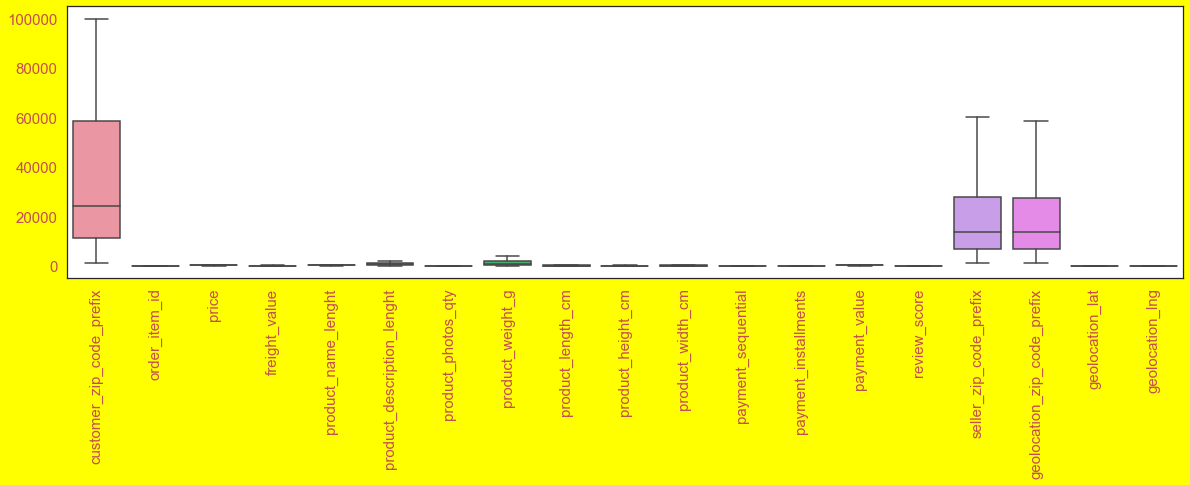

In [38]:
plt.figure(figsize=(20,5),facecolor='yellow')
sns.set(style='white')
sns.boxplot(data=df.select_dtypes(include=[int,float]))
plt.xticks(rotation=90,fontsize=15,color='r')
plt.yticks(rotation=0,fontsize=15,color='r')
plt.show()

In [39]:
print(df.price.quantile(0.01))
print(df.price.min())
print(df.price.quantile(0.99))
print(df.price.max())

9.99
0.85
271.9
271.9


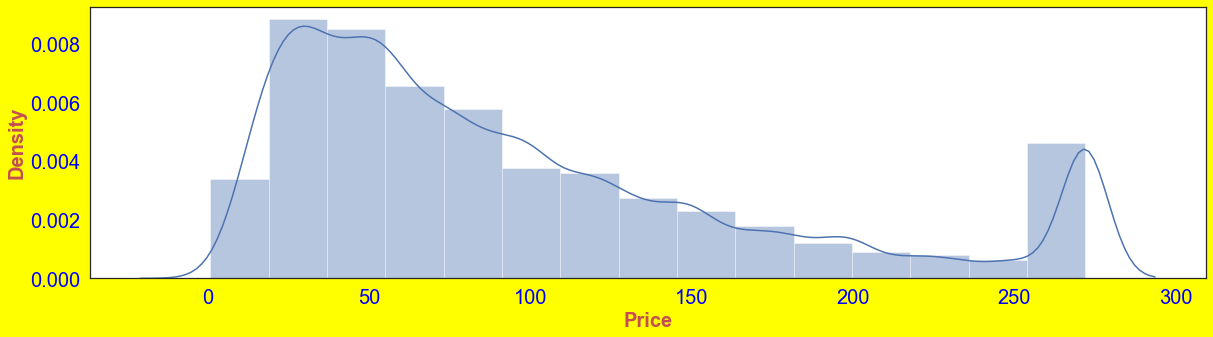

In [40]:
plt.figure(figsize=(20,5),facecolor='yellow')
sns.set(style='white') # distribution graph  and its a combination  pdf and histogram combination
sns.distplot(df.price,bins=15)        
plt.ylabel('Density',fontsize=20,color='r',fontweight='bold')
plt.xlabel('Price',fontsize=20,color='r',fontweight='bold')# X-label
plt.xticks(rotation=0,fontsize=20,color='blue')
plt.yticks(rotation=0,fontsize=20,color='blue')
plt.show()# left skewness

# 1. Performing  Detailed exploratory analysis

**Defined & calculated high level metrics like (
Total Revenue,
Total quantity, 
Total products, 
Total categories,
Total sellers,
Total locations,
Total channels, 
Total payment methods )**

In [41]:
print('Total Revenue   ',df['payment_value'].sum())
print('Total Quantity  ',df.customer_id[-df['customer_id'].duplicated()].count())
print('Total Products  ',df.product_id[-df['product_id'].duplicated()].count())
print('Total Categories',df.product_category_name[-df['product_category_name'].duplicated()].count())
print('Total Sellers',df.seller_id[-df['seller_id'].duplicated()].count())
print('Total Locations',df.customer_city[-df['customer_city'].duplicated()].count())
print(df.payment_type[-df['payment_type'].duplicated()])

Total Revenue    16744787.365
Total Quantity   99441
Total Products   32951
Total Categories 71
Total Sellers 3095
Total Locations 4119
0     credit_card
5      debit_card
18        voucher
25            UPI
Name: payment_type, dtype: object


**Understanding how many new customers acquired every month**

In [42]:
df['Year']=df.order_purchase_timestamp.dt.year
df['Month_name']=df.order_purchase_timestamp.dt.month_name()
df['Month']=df.order_purchase_timestamp.dt.month
df['Year_month']=df.order_purchase_timestamp.dt.to_period('M')
df['day_of_year']=df.order_purchase_timestamp.dt.dayofyear
df['Week_of_year']=df.order_purchase_timestamp.dt.weekofyear
df['Time']=df.order_purchase_timestamp.dt.time

In [43]:
df.sort_values(by='order_purchase_timestamp').drop_duplicates('customer_unique_id',keep='first').\
pivot_table(index='customer_unique_id',columns=['Year_month'],values=['price'],aggfunc='count',margins=True,margins_name='new_customers').fillna(0)

price                                  \
Year_month                       2016-09 2016-10 2016-12 2017-01 2017-02   
customer_unique_id                                                         
0000366f3b9a7992bf8c76cfdf3221e2     0.0     0.0     0.0     0.0     0.0   
0000b849f77a49e4a4ce2b2a4ca5be3f     0.0     0.0     0.0     0.0     0.0   
0000f46a3911fa3c0805444483337064     0.0     0.0     0.0     0.0     0.0   
0000f6ccb0745a6a4b88665a16c9f078     0.0     0.0     0.0     0.0     0.0   
0004aac84e0df4da2b147fca70cf8255     0.0     0.0     0.0     0.0     0.0   
...                                  ...     ...     ...     ...     ...   
fffea47cd6d3cc0a88bd621562a9d061     0.0     0.0     0.0     0.0     0.0   
ffff371b4d645b6ecea244b27531430a     0.0     0.0     0.0     0.0     1.0   
ffff5962728ec6157033ef9805bacc48     0.0     0.0     0.0     0.0     0.0   
ffffd2657e2aad2907e67c3e9daecbeb     0.0     0.0     0.0     0.0     0.0   
new_customers                        3.0   305.0     1.0   754.0  1705.0   

                                                                          \
Year_month                       2017-03 2017-04 2017-05 2017-06 2017-07   
customer_unique_id                                                         
0000366f3b9a7992bf8c76cfdf3221e2     0.0     0.0     0.0     0.0     0.0   
0000b849f77a49e4a4ce2b2a4ca5be3f     0.0     0.0     0.0     0.0     0.0   
0000f46a3911fa3c0805444483337064     1.0     0.0     0.0     0.0     0.0   
0000f6ccb0745a6a4b88665a16c9f078     0.0     0.0     0.0     0.0     0.0   
0004aac84e0df4da2b147fca70cf8255     0.0     0.0     0.0     0.0     0.0   
...                                  ...     ...     ...     ...     ...   
fffea47cd6d3cc0a88bd621562a9d061     0.0     0.0     0.0     0.0     0.0   
ffff371b4d645b6ecea244b27531430a     0.0     0.0     0.0     0.0     0.0   
ffff5962728ec6157033ef9805bacc48     0.0     0.0     0.0     0.0     0.0   
ffffd2657e2aad2907e67c3e9daecbeb     0.0     0.0     1.0     0.0     0.0   
new_customers                     2595.0  2339.0  3560.0  3114.0  3843.0   

                                                                          \
Year_month                       2017-08 2017-09 2017-10 2017-11 2017-12   
customer_unique_id                                                         
0000366f3b9a7992bf8c76cfdf3221e2     0.0     0.0     0.0     0.0     0.0   
0000b849f77a49e4a4ce2b2a4ca5be3f     0.0     0.0     0.0     0.0     0.0   
0000f46a3911fa3c0805444483337064     0.0     0.0     0.0     0.0     0.0   
0000f6ccb0745a6a4b88665a16c9f078     0.0     0.0     1.0     0.0     0.0   
0004aac84e0df4da2b147fca70cf8255     0.0     0.0     0.0     1.0     0.0   
...                                  ...     ...     ...     ...     ...   
fffea47cd6d3cc0a88bd621562a9d061     0.0     0.0     0.0     0.0     1.0   
ffff371b4d645b6ecea244b27531430a     0.0     0.0     0.0     0.0     0.0   
ffff5962728ec6157033ef9805bacc48     0.0     0.0     0.0     0.0     0.0   
ffffd2657e2aad2907e67c3e9daecbeb     0.0     0.0     0.0     0.0     0.0   
new_customers                     4889.0  4088.0  4408.0  7212.0  5438.0   

                                                                          \
Year_month                       2018-01 2018-02 2018-03 2018-04 2018-05   
customer_unique_id                                                         
0000366f3b9a7992bf8c76cfdf3221e2     0.0     0.0     0.0     0.0     1.0   
0000b849f77a49e4a4ce2b2a4ca5be3f     0.0     0.0     0.0     0.0     1.0   
0000f46a3911fa3c0805444483337064     0.0     0.0     0.0     0.0     0.0   
0000f6ccb0745a6a4b88665a16c9f078     0.0     0.0     0.0     0.0     0.0   
0004aac84e0df4da2b147fca70cf8255     0.0     0.0     0.0     0.0     0.0   
...                                  ...     ...     ...     ...     ...   
fffea47cd6d3cc0a88bd621562a9d061     0.0     0.0     0.0     0.0     0.0   
ffff371b4d645b6ecea244b27531430a     0.0     0.0     0.0     0.0     0.0   
ffff

**Understanding the retention of customers on month on month basis**

In [44]:
df[df.sort_values(by='order_purchase_timestamp').duplicated('customer_unique_id',keep='first')].\
pivot_table(index='customer_unique_id',columns=['Year_month'],values=['price'],aggfunc='nunique',margins=True,margins_name='Retension_Customers').fillna(0)

price                                  \
Year_month                       2016-09 2016-10 2017-01 2017-02 2017-03   
customer_unique_id                                                         
00053a61a98854899e70ed204dd4bafe     0.0     0.0     0.0     0.0     0.0   
000bfa1d2f1a41876493be685390d6d3     0.0     0.0     0.0     0.0     0.0   
000de6019bb59f34c099a907c151d855     0.0     0.0     0.0     0.0     0.0   
000e309254ab1fc5ba99dd469d36bdb4     0.0     0.0     0.0     0.0     0.0   
000fbf0473c10fc1ab6f8d2d286ce20c     0.0     0.0     0.0     0.0     0.0   
...                                  ...     ...     ...     ...     ...   
fff22793223fe80c97a8fd02ac5c6295     0.0     0.0     0.0     0.0     0.0   
fff5eb4918b2bf4b2da476788d42051c     0.0     0.0     0.0     0.0     0.0   
fff7219c86179ca6441b8f37823ba3d3     0.0     0.0     0.0     0.0     0.0   
fffcf5a5ff07b0908bd4e2dbc735a684     0.0     0.0     0.0     0.0     0.0   
Retension_Customers                  2.0    35.0   102.0   160.0   202.0   

                                                                          \
Year_month                       2017-04 2017-05 2017-06 2017-07 2017-08   
customer_unique_id                                                         
00053a61a98854899e70ed204dd4bafe     0.0     0.0     0.0     0.0     0.0   
000bfa1d2f1a41876493be685390d6d3     0.0     0.0     0.0     0.0     0.0   
000de6019bb59f34c099a907c151d855     0.0     0.0     0.0     0.0     1.0   
000e309254ab1fc5ba99dd469d36bdb4     0.0     0.0     0.0     0.0     0.0   
000fbf0473c10fc1ab6f8d2d286ce20c     0.0     0.0     0.0     0.0     0.0   
...                                  ...     ...     ...     ...     ...   
fff22793223fe80c97a8fd02ac5c6295     0.0     0.0     0.0     0.0     0.0   
fff5eb4918b2bf4b2da476788d42051c     0.0     0.0     0.0     0.0     0.0   
fff7219c86179ca6441b8f37823ba3d3     0.0     0.0     0.0     0.0     0.0   
fffcf5a5ff07b0908bd4e2dbc735a684     0.0     0.0     1.0     0.0     0.0   
Retension_Customers                205.0   280.0   240.0   348.0   334.0   

                                                                          \
Year_month                       2017-09 2017-10 2017-11 2017-12 2018-01   
customer_unique_id                                                         
00053a61a98854899e70ed204dd4bafe     0.0     0.0     0.0     0.0     0.0   
000bfa1d2f1a41876493be685390d6d3     1.0     0.0     0.0     0.0     0.0   
000de6019bb59f34c099a907c151d855     0.0     0.0     0.0     0.0     0.0   
000e309254ab1fc5ba99dd469d36bdb4     0.0     0.0     0.0     0.0     0.0   
000fbf0473c10fc1ab6f8d2d286ce20c     0.0     0.0     0.0     0.0     0.0   
...                                  ...     ...     ...     ...     ...   
fff22793223fe80c97a8fd02ac5c6295     0.0     0.0     0.0     0.0     0.0   
fff5eb4918b2bf4b2da476788d42051c     0.0     0.0     0.0     0.0     0.0   
fff7219c86179ca6441b8f37823ba3d3     0.0     0.0     0.0     1.0     0.0   
fffcf5a5ff07b0908bd4e2dbc735a684     0.0     0.0     0.0     0.0     0.0   
Retension_Customers                317.0   348.0   468.0   346.0   454.0   

                                                                          \
Year_month                       2018-02 2018-03 2018-04 2018-05 2018-06   
customer_unique_id                                                         
00053a61a98854899e70ed204dd4bafe     1.0     0.0     0.0     0.0     0.0   
000bfa1d2f1a41876493be685390d6d3     0.0     0.0     0.0     0.0     0.0   
000de6019bb59f34c099a907c151d855     0.0     0.0     0.0     0.0     0.0   
000e309254ab1fc5ba99dd469d36bdb4     0.0     0.0     0.0     0.0     1.0   
000fbf0473c10fc1ab6f8d2d286ce20c     0.0     0.0     0.0     0.0     0.0   
...                                  ...     ...     ...     ...     ...   
fff22793223fe80c97a8fd02ac5c6295     0.0     0.0     0.0     0.0     1.0   
fff5eb4918b2bf4b2da476788d42051c     0.0     0.0     0.0     0.0     0.0   
fff7

**Findind out  How the revenues from existing/new customers on month on month basis**

In [45]:
df.sort_values(by='order_purchase_timestamp').drop_duplicates('customer_unique_id',keep='first').\
pivot_table(index='customer_unique_id',columns=['Year_month'],values=['price'],aggfunc='sum',margins=True,margins_name='Sum _new_customers').fillna(0)

price                              \
Year_month                       2016-09   2016-10 2016-12   2017-01   
customer_unique_id                                                     
0000366f3b9a7992bf8c76cfdf3221e2    0.00      0.00     0.0      0.00   
0000b849f77a49e4a4ce2b2a4ca5be3f    0.00      0.00     0.0      0.00   
0000f46a3911fa3c0805444483337064    0.00      0.00     0.0      0.00   
0000f6ccb0745a6a4b88665a16c9f078    0.00      0.00     0.0      0.00   
0004aac84e0df4da2b147fca70cf8255    0.00      0.00     0.0      0.00   
...                                  ...       ...     ...       ...   
fffea47cd6d3cc0a88bd621562a9d061    0.00      0.00     0.0      0.00   
ffff371b4d645b6ecea244b27531430a    0.00      0.00     0.0      0.00   
ffff5962728ec6157033ef9805bacc48    0.00      0.00     0.0      0.00   
ffffd2657e2aad2907e67c3e9daecbeb    0.00      0.00     0.0      0.00   
Sum _new_customers                137.39  34397.38    10.9  80402.02   

                                                                              \
Year_month                          2017-02    2017-03    2017-04    2017-05   
customer_unique_id                                                             
0000366f3b9a7992bf8c76cfdf3221e2       0.00       0.00       0.00       0.00   
0000b849f77a49e4a4ce2b2a4ca5be3f       0.00       0.00       0.00       0.00   
0000f46a3911fa3c0805444483337064       0.00      69.00       0.00       0.00   
0000f6ccb0745a6a4b88665a16c9f078       0.00       0.00       0.00       0.00   
0004aac84e0df4da2b147fca70cf8255       0.00       0.00       0.00       0.00   
...                                     ...        ...        ...        ...   
fffea47cd6d3cc0a88bd621562a9d061       0.00       0.00       0.00       0.00   
ffff371b4d645b6ecea244b27531430a      89.90       0.00       0.00       0.00   
ffff5962728ec6157033ef9805bacc48       0.00       0.00       0.00       0.00   
ffffd2657e2aad2907e67c3e9daecbeb       0.00       0.00       0.00      56.99   
Sum _new_customers                170864.66  260855.54  246123.91  357267.61   

                                                                              \
Year_month                          2017-06    2017-07    2017-08    2017-09   
customer_unique_id                                                             
0000366f3b9a7992bf8c76cfdf3221e2       0.00       0.00       0.00       0.00   
0000b849f77a49e4a4ce2b2a4ca5be3f       0.00       0.00       0.00       0.00   
0000f46a3911fa3c0805444483337064       0.00       0.00       0.00       0.00   
0000f6ccb0745a6a4b88665a16c9f078       0.00       0.00       0.00       0.00   
0004aac84e0df4da2b147fca70cf8255       0.00       0.00       0.00       0.00   
...                                     ...        ...        ...        ...   
fffea47cd6d3cc0a88bd621562a9d061       0.00       0.00       0.00       0.00   
ffff371b4d645b6ecea244b27531430a       0.00       0.00       0.00       0.00   
ffff5962728ec6157033ef9805bacc48       0.00       0.00       0.00       0.00   
ffffd2657e2aad2907e67c3e9daecbeb       0.00       0.00       0.00       0.00   
Sum _new_customers                308802.18  378268.23  467358.58  424172.77   

                                                                              \
Year_month                          2017-10    2017-11    2017-12    2018-01   
customer_unique_id                                                             
0000366f3b9a7992bf8c76cfdf3221e2       0.00       0.00       0.00       0.00   
0000b849f77a49e4a4ce2b2a4ca5be3f       0.00       0.00       0.00       0.00   
0000f46a3911fa3c0805444483337064       0.00       0.00       0.00       0.00   
0000f6ccb0745a6a4b88665a16c9f078      25.99       0.00       0.00       0.00   
0004aac84e0df4da2b147fca70cf8255       0.00     180.00       0.00       0.00   
...                                     ...        ...        ...        ...   
fffea47cd6d3cc0a88bd621562a9d061       0.00       0.00      64.8

**How the revenues from existing  on month on month basis**

In [46]:
df[df.sort_values(by='order_purchase_timestamp').duplicated('customer_unique_id',keep='first')].\
pivot_table(index='customer_unique_id',columns=['Year_month'],values='price',aggfunc=['sum'],margins=True,margins_name='Retension_Customers').fillna(0)

sum                               \
Year_month                       2016-09  2016-10   2017-01   2017-02   
customer_unique_id                                                      
00053a61a98854899e70ed204dd4bafe    0.00     0.00      0.00      0.00   
000bfa1d2f1a41876493be685390d6d3    0.00     0.00      0.00      0.00   
000de6019bb59f34c099a907c151d855    0.00     0.00      0.00      0.00   
000e309254ab1fc5ba99dd469d36bdb4    0.00     0.00      0.00      0.00   
000fbf0473c10fc1ab6f8d2d286ce20c    0.00     0.00      0.00      0.00   
...                                  ...      ...       ...       ...   
fff22793223fe80c97a8fd02ac5c6295    0.00     0.00      0.00      0.00   
fff5eb4918b2bf4b2da476788d42051c    0.00     0.00      0.00      0.00   
fff7219c86179ca6441b8f37823ba3d3    0.00     0.00      0.00      0.00   
fffcf5a5ff07b0908bd4e2dbc735a684    0.00     0.00      0.00      0.00   
Retension_Customers               129.97  6150.48  20504.68  31973.44   

                                                                          \
Year_month                         2017-03   2017-04   2017-05   2017-06   
customer_unique_id                                                         
00053a61a98854899e70ed204dd4bafe      0.00      0.00      0.00      0.00   
000bfa1d2f1a41876493be685390d6d3      0.00      0.00      0.00      0.00   
000de6019bb59f34c099a907c151d855      0.00      0.00      0.00      0.00   
000e309254ab1fc5ba99dd469d36bdb4      0.00      0.00      0.00      0.00   
000fbf0473c10fc1ab6f8d2d286ce20c      0.00      0.00      0.00      0.00   
...                                    ...       ...       ...       ...   
fff22793223fe80c97a8fd02ac5c6295      0.00      0.00      0.00      0.00   
fff5eb4918b2bf4b2da476788d42051c      0.00      0.00      0.00      0.00   
fff7219c86179ca6441b8f37823ba3d3      0.00      0.00      0.00      0.00   
fffcf5a5ff07b0908bd4e2dbc735a684      0.00      0.00      0.00    271.90   
Retension_Customers               49377.94  52145.43  77925.32  55594.77   

                                                                          \
Year_month                         2017-07   2017-08   2017-09   2017-10   
customer_unique_id                                                         
00053a61a98854899e70ed204dd4bafe      0.00      0.00      0.00      0.00   
000bfa1d2f1a41876493be685390d6d3      0.00      0.00     35.00      0.00   
000de6019bb59f34c099a907c151d855      0.00    139.90      0.00      0.00   
000e309254ab1fc5ba99dd469d36bdb4      0.00      0.00      0.00      0.00   
000fbf0473c10fc1ab6f8d2d286ce20c      0.00      0.00      0.00      0.00   
...                                    ...       ...       ...       ...   
fff22793223fe80c97a8fd02ac5c6295      0.00      0.00      0.00      0.00   
fff5eb4918b2bf4b2da476788d42051c      0.00      0.00      0.00      0.00   
fff7219c86179ca6441b8f37823ba3d3      0.00      0.00      0.00      0.00   
fffcf5a5ff07b0908bd4e2dbc735a684      0.00      0.00      0.00      0.00   
Retension_Customers               90007.17  86872.03  95997.31  98648.55   

                                                                            \
Year_month                          2017-11   2017-12    2018-01   2018-02   
customer_unique_id                                                           
00053a61a98854899e70ed204dd4bafe       0.00      0.00       0.00     191.0   
000bfa1d2f1a41876493be685390d6d3       0.00      0.00       0.00       0.0   
000de6019bb59f34c099a907c151d855       0.00      0.00       0.00       0.0   
000e309254ab1fc5ba99dd469d36bdb4       0.00      0.00       0.00       0.0   
000fbf0473c10fc1ab6f8d2d286ce20c       0.00      0.00       0.00       0.0   
...                                     ...       ...        ...       ...   
fff22793223fe80c97a8fd02ac5c6295       0.00      0.00       0.00       0.0   
fff5eb4918b2bf4b2da476788d42051c       0.00      0.00       0.00       0.0   
fff7219c86179ca6441b8f3782

In [47]:
df.pivot_table(index='customer_id',columns='Year_month',values='payment_value',aggfunc='sum',margins=True,margins_name='new_customers').fillna(0)

Year_month,2016-09,2016-10,2016-12,2017-01,2017-02,2017-03,2017-04,2017-05,2017-06,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04,2018-05,2018-06,2018-07,2018-08,2018-09,new_customers
customer_id,,,,,,,,,,,,,,,,,,,,,,,,,
00012a2ce6f8dcda20d059ce98491703,0.00,0.00,0.00,0.00,0.000,0.000,0.00,0.000,0.00,0.00,0.000,0.00,0.000,114.740,0.00,0.000,0.000,0.00,0.00,0.00,0.00,0.00,0.000,0.00,1.147400e+02
000161a058600d5901f007fab4c27140,0.00,0.00,0.00,0.00,0.000,0.000,0.00,0.000,0.00,67.41,0.000,0.00,0.000,0.000,0.00,0.000,0.000,0.00,0.00,0.00,0.00,0.00,0.000,0.00,6.741000e+01
0001fd6190edaaf884bcaf3d49edf079,0.00,0.00,0.00,0.00,195.420,0.000,0.00,0.000,0.00,0.00,0.000,0.00,0.000,0.000,0.00,0.000,0.000,0.00,0.00,0.00,0.00,0.00,0.000,0.00,1.954200e+02
0002414f95344307404f0ace7a26f1d5,0.00,0.00,0.00,0.00,0.000,0.000,0.00,0.000,0.00,0.00,179.350,0.00,0.000,0.000,0.00,0.000,0.000,0.00,0.00,0.00,0.00,0.00,0.000,0.00,1.793500e+02
000379cdec625522490c315e70c7a9fb,0.00,0.00,0.00,0.00,0.000,0.000,0.00,0.000,0.00,0.00,0.000,0.00,0.000,0.000,0.00,0.000,0.000,0.00,107.01,0.00,0.00,0.00,0.000,0.00,1.070100e+02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
fffeda5b6d849fbd39689bb92087f431,0.00,0.00,0.00,0.00,0.000,0.000,0.00,0.000,0.00,0.00,0.000,0.00,0.000,0.000,0.00,0.000,0.000,0.00,0.00,63.13,0.00,0.00,0.000,0.00,6.313000e+01
ffff42319e9b2d713724ae527742af25,0.00,0.00,0.00,0.00,0.000,0.000,0.00,0.000,0.00,0.00,0.000,0.00,0.000,0.000,0.00,0.000,0.000,0.00,0.00,0.00,214.13,0.00,0.000,0.00,2.141300e+02
ffffa3172527f765de70084a7e53aae8,0.00,0.00,0.00,0.00,0.000,0.000,0.00,0.000,0.00,0.00,0.000,91.00,0.000,0.000,0.00,0.000,0.000,0.00,0.00,0.00,0.00,0.00,0.000,0.00,9.100000e+01


**Understanding  the trends/seasonality of sales, quantity by category, location, month,
week, day, time, channel, payment method etc**

**Sales by Category Wise**

In [48]:
c=(df.pivot_table(index='product_category_name',values='payment_value',aggfunc='sum')).\
sort_values(by='payment_value',ascending=False).reset_index().\
rename({'payment_value':'Sum_of_Product','product_category_name':'Category_name'},axis=1)
d=c.head(10)
d

,Category_name,Sum_of_Product
0,Bed_Bath_Table,1916644.650
1,Health_Beauty,1411096.260
2,Furniture_Decor,1290413.740
3,Sports_Leisure,1235728.570
4,Computers_Accessories,1225976.455
5,Watches_Gifts,1106695.330
6,Housewares,944978.060
7,Garden_Tools,686661.420
8,Cool_Stuff,657332.555
9,Auto,647506.805


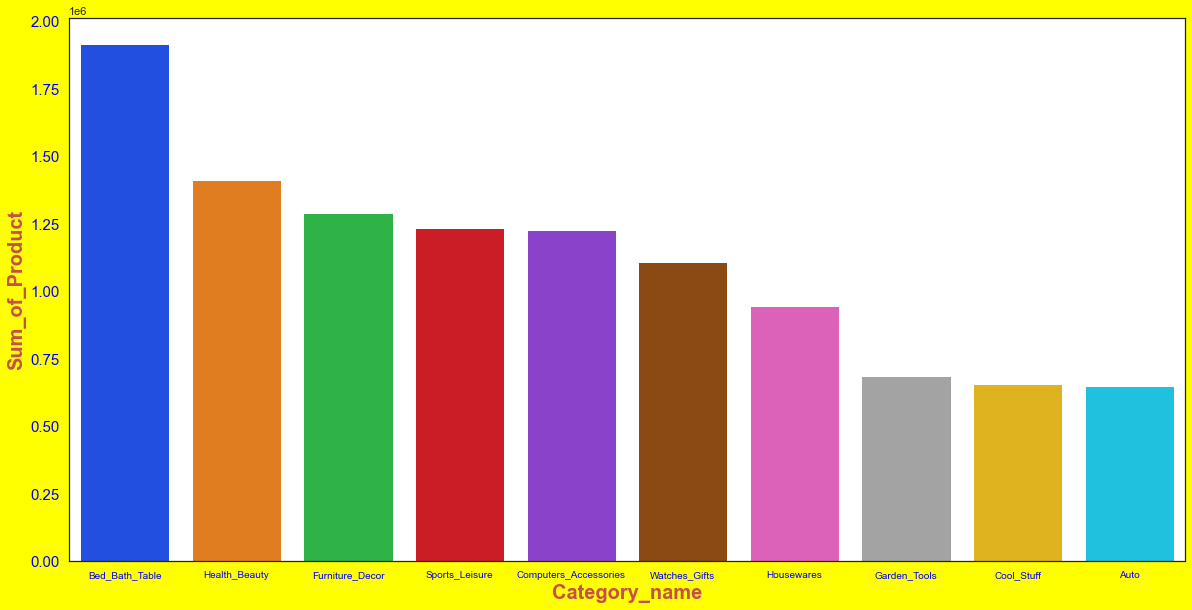

In [49]:
plt.figure(figsize=(20,10),facecolor='yellow')
sns.set(style='white')#plt.axes().set_facecolor('white')
sns.barplot(data=d,x='Category_name',y='Sum_of_Product',palette='bright',errwidth=0)
plt.ylabel('Sum_of_Product',fontsize=20,color='r',fontweight='bold')
plt.xlabel('Category_name',fontsize=20,color='r',fontweight='bold')
plt.xticks(rotation=0,fontsize=10,color='blue')
plt.yticks(rotation=0,fontsize=15,color='blue')
plt.grid(False)
plt.show()

**Quantity by Category Wise**

In [50]:
c=(df.pivot_table(index='product_category_name',values='payment_value',aggfunc='count')).\
sort_values(by='payment_value',ascending=False).\
reset_index().rename({'payment_value':'Count_of_Product','product_category_name':'Category_name'},axis=1)
d=c.head(10)
d

,Category_name,Count_of_Product
0,Bed_Bath_Table,14499
1,Health_Beauty,10033
2,Sports_Leisure,9005
3,Furniture_Decor,8833
4,Computers_Accessories,8151
5,Housewares,7380
6,Watches_Gifts,6213
7,Telephony,4726
8,Garden_Tools,4590
9,Auto,4400


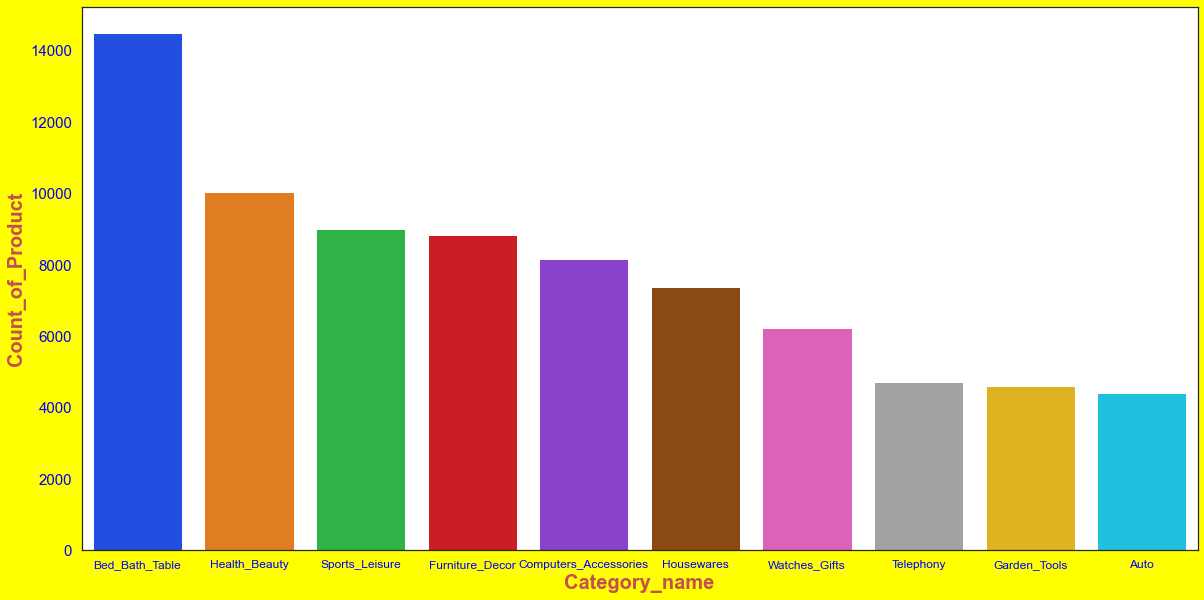

In [51]:
plt.figure(figsize=(20,10),facecolor='yellow')
sns.set(style='white')#plt.axes().set_facecolor('white')
sns.barplot(data=d,x='Category_name',y='Count_of_Product',palette='bright',errwidth=0)
plt.ylabel('Count_of_Product',fontsize=20,color='r',fontweight='bold')
plt.xlabel('Category_name',fontsize=20,color='r',fontweight='bold')
plt.xticks(rotation=0,fontsize=12,color='blue')
plt.yticks(rotation=0,fontsize=15,color='blue')
plt.grid(False)
plt.show()

**Sales by Location Wise**

In [52]:
c=(df.pivot_table(index='customer_city',values='payment_value',aggfunc='sum')).\
sort_values(by='payment_value',ascending=False).reset_index().\
rename({'payment_value':'Sales_by_location','customer_city':'Location'},axis=1)
d=c.head(10)
d

,Location,Sales_by_location
0,Akkarampalle,2406014.190
1,Badepalle,1206535.480
2,Anantapur,448099.735
3,Eddumailaram,361527.825
4,Anakapalle,264438.140
5,Eluru,256378.945
6,Alwal,230638.650
7,Pedana,225651.655
8,Bestavaripeta,179660.255
9,Jaggayyapet,146748.890


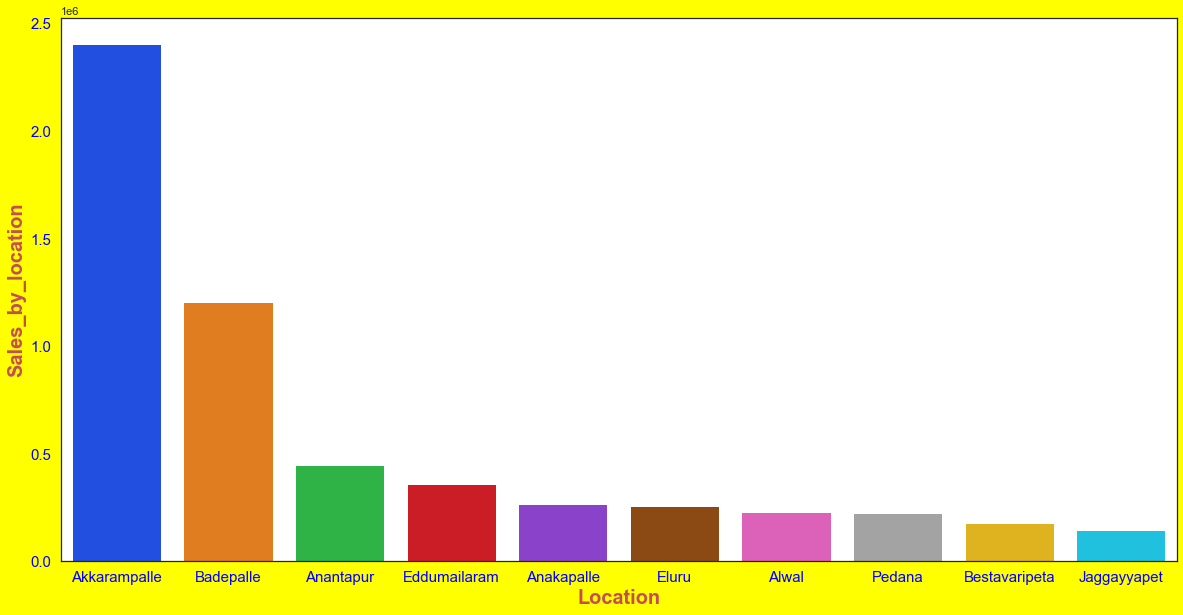

In [53]:
plt.figure(figsize=(20,10),facecolor='yellow')
sns.set(style='white')#plt.axes().set_facecolor('white')
sns.barplot(data=d,x='Location',y='Sales_by_location',palette='bright',errwidth=0)
plt.ylabel('Sales_by_location',fontsize=20,color='r',fontweight='bold')
plt.xlabel('Location',fontsize=20,color='r',fontweight='bold')
plt.xticks(rotation=0,fontsize=15,color='blue')
plt.yticks(rotation=0,fontsize=15,color='blue')
plt.grid(False)
plt.show()

**Quantity by Location Wise**

In [54]:
c=(df.pivot_table(index='customer_city',values='payment_value',aggfunc='count')).\
sort_values(by='payment_value',ascending=False).reset_index().\
rename({'payment_value':'Count_by_location','customer_city':'Location'},axis=1)
d=c.head(10)
d

,Location,Count_by_location
0,Akkarampalle,18866
1,Badepalle,8309
2,Anantapur,3297
3,Eddumailaram,2499
4,Anakapalle,1827
5,Alwal,1758
6,Eluru,1674
7,Pedana,1544
8,Bestavaripeta,1415
9,Adoni,1131


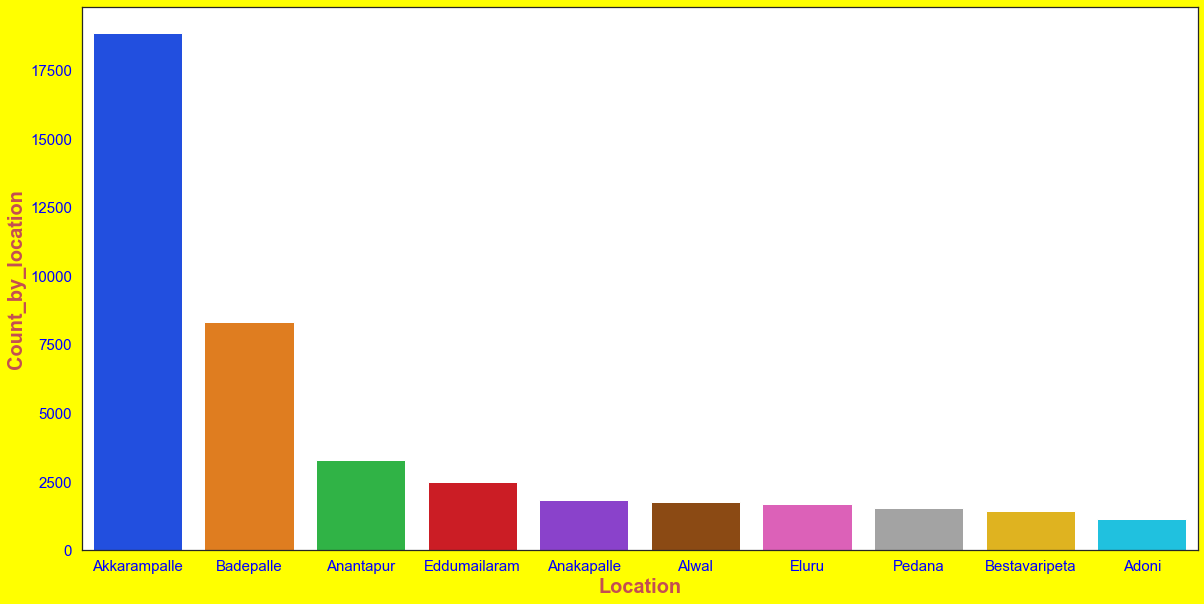

In [55]:
plt.figure(figsize=(20,10),facecolor='yellow')
sns.set(style='white')#plt.axes().set_facecolor('white')
sns.barplot(data=d,x='Location',y='Count_by_location',palette='bright',errwidth=0)
plt.ylabel('Count_by_location',fontsize=20,color='r',fontweight='bold')
plt.xlabel('Location',fontsize=20,color='r',fontweight='bold')
plt.xticks(rotation=0,fontsize=15,color='blue')
plt.yticks(rotation=0,fontsize=15,color='blue')
plt.grid(False)
plt.show()

**Sales by payment method Wise**

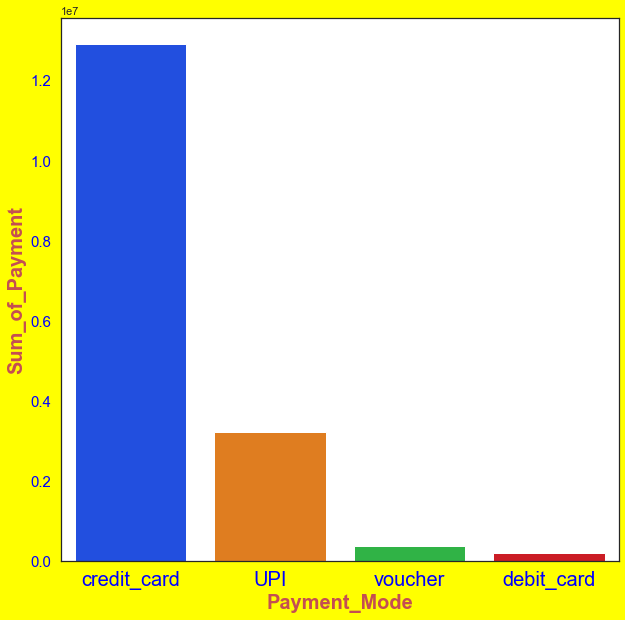

In [56]:
c=(df.pivot_table(index='payment_type',values='payment_value',aggfunc='sum')).\
sort_values(by='payment_value',ascending=False).\
reset_index().rename({'payment_value':'Sum_of_Payment','payment_type':'Payment_Mode'},axis=1)
plt.figure(figsize=(10,10),facecolor='yellow')
sns.set(style='white')#plt.axes().set_facecolor('white')
sns.barplot(data=c,x='Payment_Mode',y='Sum_of_Payment',palette='bright',errwidth=0)
plt.ylabel('Sum_of_Payment',fontsize=20,color='r',fontweight='bold')
plt.xlabel('Payment_Mode',fontsize=20,color='r',fontweight='bold')
plt.xticks(rotation=0,fontsize=20,color='blue')
plt.yticks(rotation=0,fontsize=15,color='blue')
plt.grid(False)
plt.show()

**Quantity by Payment Method Wise**

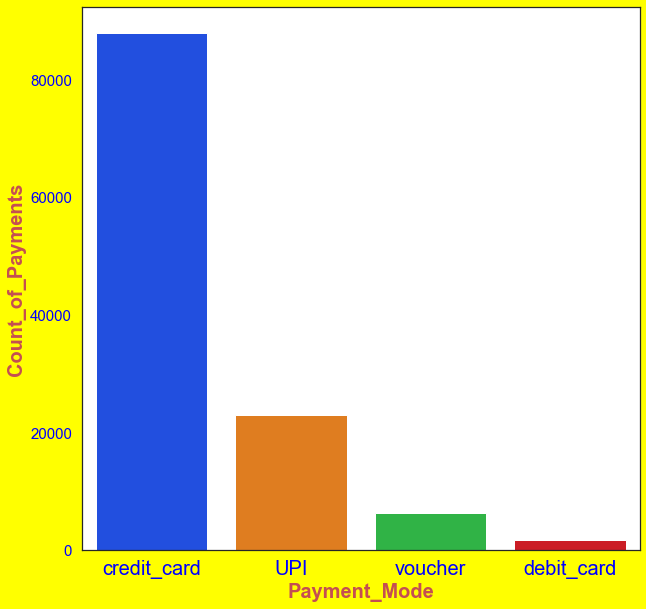

In [57]:
c=(df.pivot_table(index='payment_type',values='payment_value',aggfunc='count')).\
sort_values(by='payment_value',ascending=False).\
reset_index().rename({'payment_value':'Count_of_Payments','payment_type':'Payment_Mode'},axis=1)
plt.figure(figsize=(10,10),facecolor='yellow')
sns.set(style='white')#plt.axes().set_facecolor('white')
sns.barplot(data=c,x='Payment_Mode',y='Count_of_Payments',palette='bright',errwidth=0)
plt.ylabel('Count_of_Payments',fontsize=20,color='r',fontweight='bold')
plt.xlabel('Payment_Mode',fontsize=20,color='r',fontweight='bold')
plt.xticks(rotation=0,fontsize=20,color='blue')
plt.yticks(rotation=0,fontsize=15,color='blue')
plt.grid(False)
plt.show()

**Sales by Year Wise**

In [58]:
p=(df.pivot_table(index='Year',values='payment_value',aggfunc='sum')).\
sort_values(by='payment_value',ascending=False).\
reset_index().rename({'payment_value':'Sum_by_Year'},axis=1)
p

,Year,Sum_by_Year
0,2018,9120203.235
1,2017,7561628.300
2,2016,62955.830


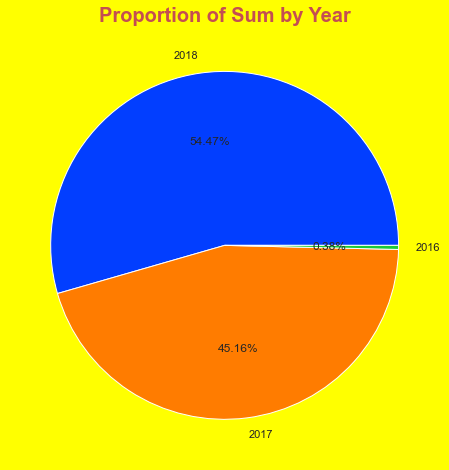

In [59]:
plt.figure(figsize=(10,8),facecolor='yellow')
colors = sns.color_palette('bright')[0:5]
plt.pie(x=p.Sum_by_Year,
             labels=p.Year,
             autopct='%.2f%%',
             colors=colors)
plt.title('Proportion of Sum by Year',fontsize=20,color='r',fontweight='bold')
plt.show()

**Quantity by Year Wise**

In [60]:
p=(df.pivot_table(index='Year',values='payment_value',aggfunc='count')).\
sort_values(by='payment_value',ascending=False).\
reset_index().rename({'payment_value':'Count_of_Year'},axis=1)
p

,Year,Count_of_Year
0,2018,63941
1,2017,54759
2,2016,393


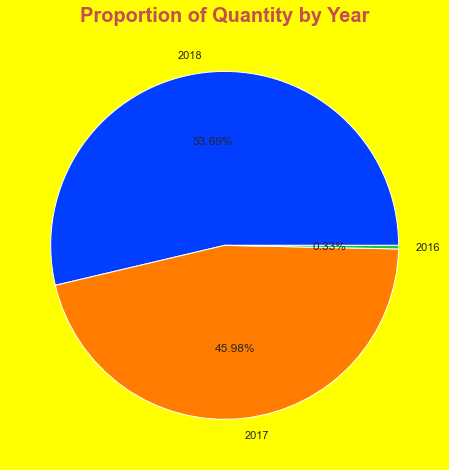

In [61]:
plt.figure(figsize=(10,8),facecolor='yellow')
colors = sns.color_palette('bright')[0:5]
plt.pie(x=p.Count_of_Year,
             labels=p.Year,
             autopct='%.2f%%',
             colors=colors)
plt.title('Proportion of Quantity by Year',fontsize=20,color='r',fontweight='bold')
plt.show()

**Sales by month Wise**

In [62]:
c=(df.pivot_table(index='Year_month',values='payment_value',aggfunc='sum')).\
reset_index().rename({'payment_value':'Sum_by_Months'},axis=1)
c

,Year_month,Sum_by_Months
0,2016-09,672.120
1,2016-10,62264.090
2,2016-12,19.620
3,2017-01,153841.520
4,2017-02,284754.005
5,2017-03,436368.345
6,2017-04,396588.670
7,2017-05,598544.975
8,2017-06,494563.670
9,2017-07,651026.970


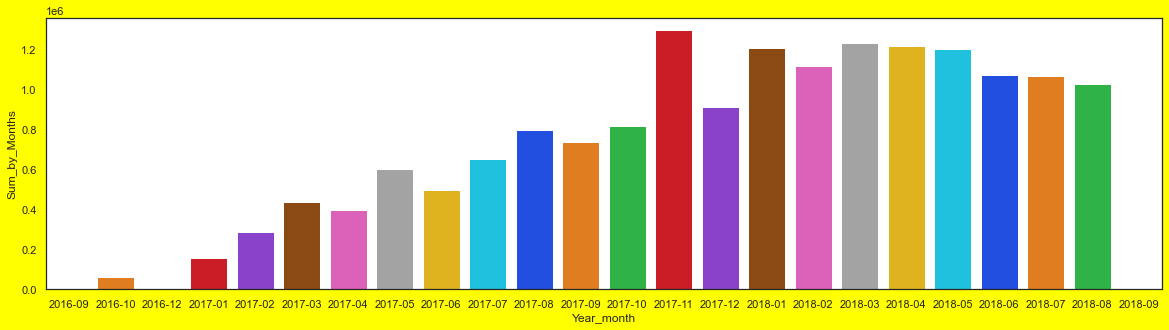

In [63]:
plt.figure(figsize=(20,5),facecolor='yellow')
sns.set(style='white')
sns.barplot(data=c,y='Sum_by_Months',x='Year_month',palette='bright',errwidth=0)
plt.show()

**Quantity by month Wise**

In [64]:
c=(df.pivot_table(index='Year_month',values='payment_value',aggfunc='count')).\
reset_index().rename({'payment_value':'Count_by_Months'},axis=1)
c

,Year_month,Count_by_Months
0,2016-09,6
1,2016-10,386
2,2016-12,1
3,2017-01,1023
4,2017-02,2073
5,2017-03,3201
6,2017-04,2864
7,2017-05,4445
8,2017-06,3822
9,2017-07,4887


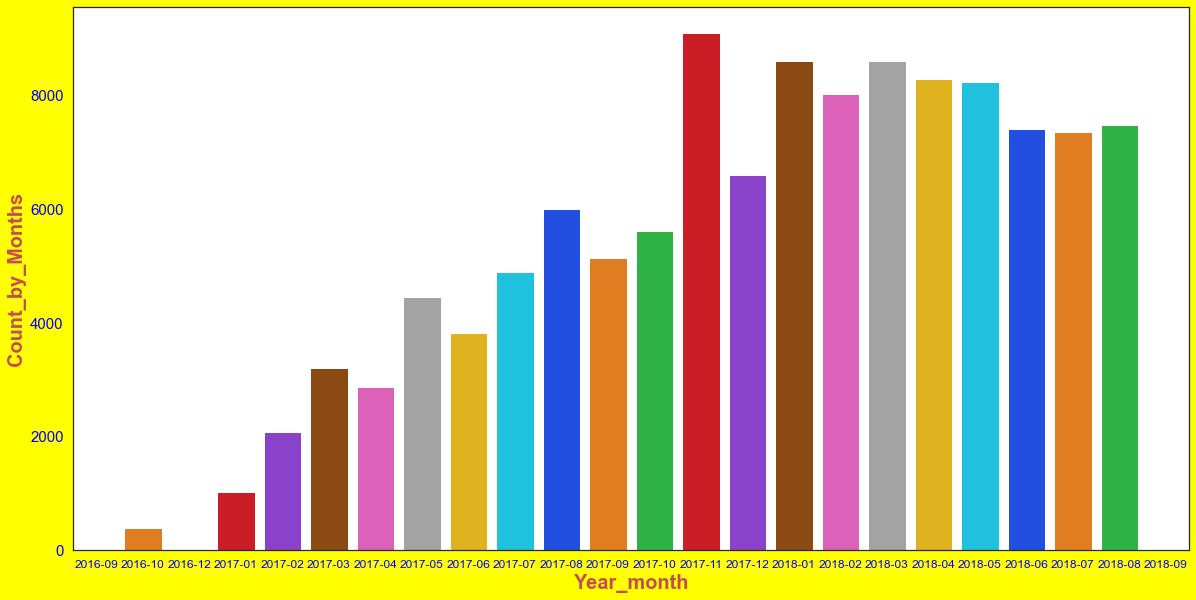

In [65]:
plt.figure(figsize=(20,10),facecolor='yellow')
sns.set(style='white')#plt.axes().set_facecolor('white')
sns.barplot(data=c,x='Year_month',y='Count_by_Months',palette='bright',errwidth=0)
plt.ylabel('Count_by_Months',fontsize=20,color='r',fontweight='bold')
plt.xlabel('Year_month',fontsize=20,color='r',fontweight='bold')
plt.xticks(rotation=0,fontsize=12,color='blue')
plt.yticks(rotation=0,fontsize=15,color='blue')
plt.grid(False)
plt.show()

**Sales by Week_of_year Wise**

In [66]:
p=(df.pivot_table(index=['Year','Week_of_year'],values='payment_value',aggfunc='sum')).\
rename({'payment_value':'Sum_by_Week'},axis=1).reset_index()
c=p.head(10)
c

,Year,Week_of_year,Sum_by_Week
0,2016,35,272.460
1,2016,36,75.060
2,2016,37,324.600
3,2016,39,109.340
4,2016,40,57214.035
5,2016,41,4940.715
6,2016,51,19.620
7,2017,1,3857.175
8,2017,2,15089.800
9,2017,3,36585.045


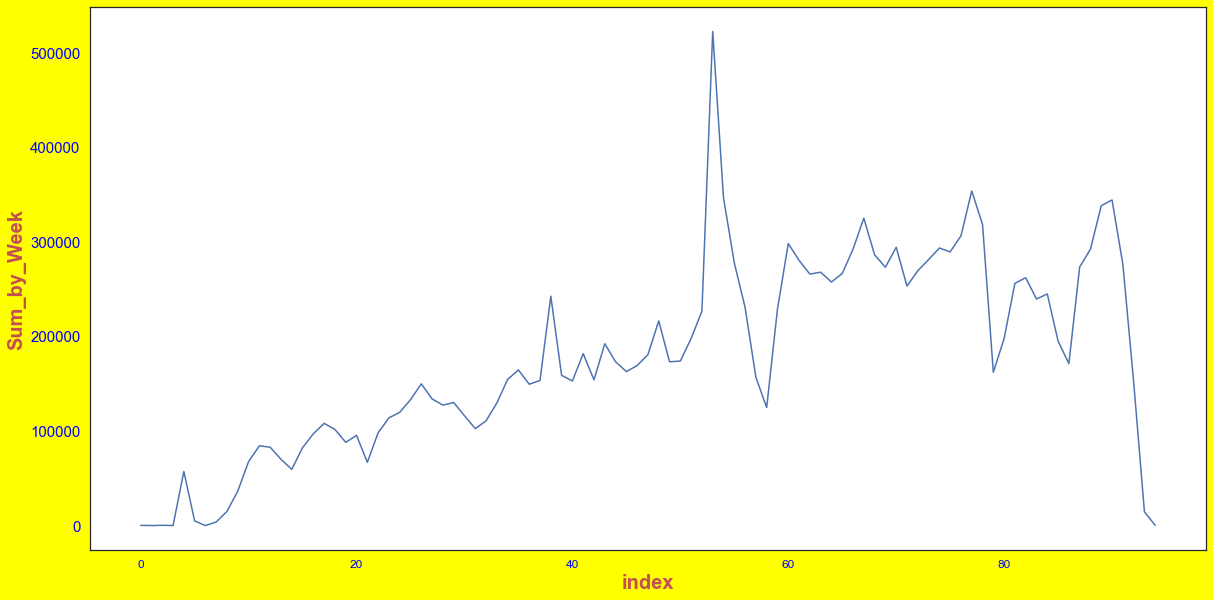

In [67]:
plt.figure(figsize=(20,10),facecolor='yellow')
sns.set(style='white')#plt.axes().set_facecolor('white')
sns.lineplot(x=p.index,y=p.Sum_by_Week,palette='bright')
plt.ylabel('Sum_by_Week',fontsize=20,color='r',fontweight='bold')
plt.xlabel('index',fontsize=20,color='r',fontweight='bold')
plt.xticks(rotation=0,fontsize=12,color='blue')
plt.yticks(rotation=0,fontsize=15,color='blue')
plt.grid(False)
plt.show()

**Quantity by Week_of_year Wise**

In [68]:
p=(df.pivot_table(index=['Year','Week_of_year'],values='payment_value',aggfunc='count')).\
rename({'payment_value':'Count_by_Week'},axis=1).reset_index()
p.head(10)

,Year,Week_of_year,Count_by_Week
0,2016,35,2
1,2016,36,1
2,2016,37,3
3,2016,39,1
4,2016,40,338
5,2016,41,47
6,2016,51,1
7,2017,1,51
8,2017,2,90
9,2017,3,264


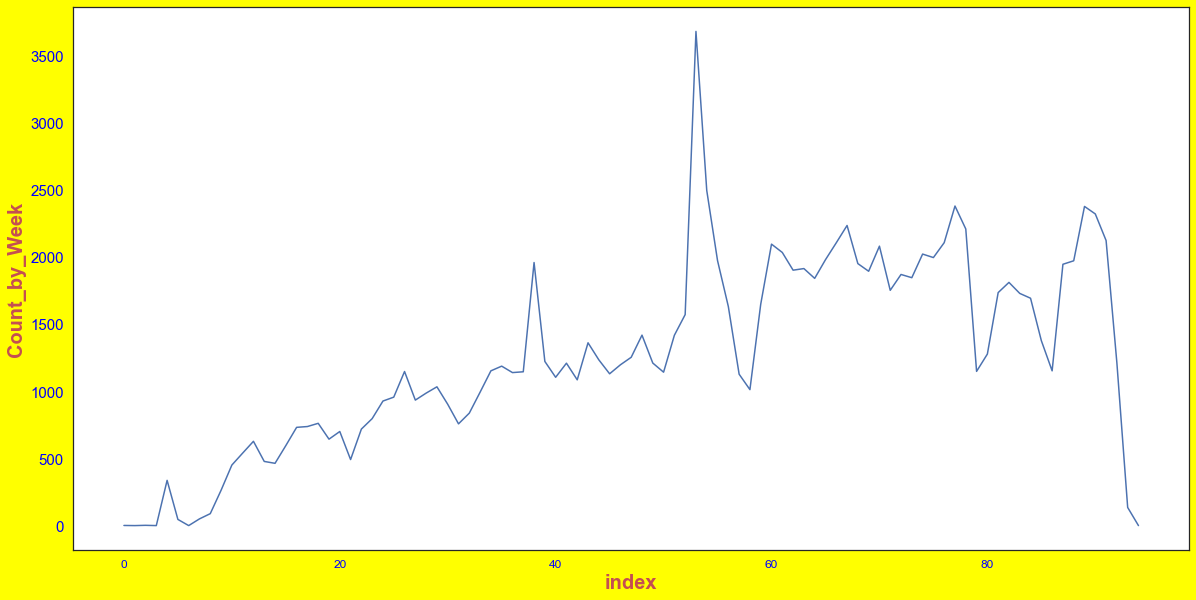

In [69]:
plt.figure(figsize=(20,10),facecolor='yellow')
sns.set(style='white')#plt.axes().set_facecolor('white')
sns.lineplot(x=p.index,y=p.Count_by_Week,palette='bright')
plt.ylabel('Count_by_Week',fontsize=20,color='r',fontweight='bold')
plt.xlabel('index',fontsize=20,color='r',fontweight='bold')
plt.xticks(rotation=0,fontsize=12,color='blue')
plt.yticks(rotation=0,fontsize=15,color='blue')
plt.grid(False)
plt.show()

**Sales by day_of_year Wise**

In [70]:
p=(df.pivot_table(index=['Year','day_of_year'],values='payment_value',aggfunc='sum')).\
rename({'payment_value':'Sum_by_day'},axis=1).reset_index()
p.head(10)

,Year,day_of_year,Sum_by_day
0,2016,248,272.460
1,2016,249,75.060
2,2016,259,324.600
3,2016,276,109.340
4,2016,277,595.140
5,2016,278,11875.705
6,2016,279,11221.415
7,2016,280,9028.130
8,2016,281,9749.130
9,2016,282,8442.215


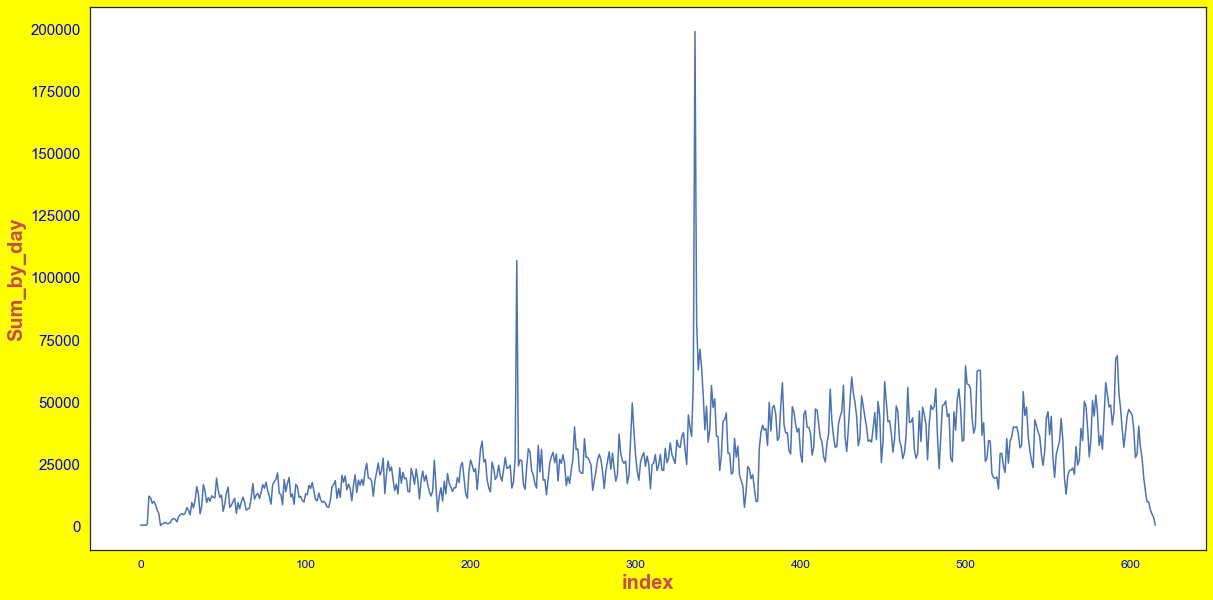

In [71]:
plt.figure(figsize=(20,10),facecolor='yellow')
sns.set(style='white')#plt.axes().set_facecolor('white')
sns.lineplot(x=p.index,y=p.Sum_by_day,palette='bright')
plt.ylabel('Sum_by_day',fontsize=20,color='r',fontweight='bold')
plt.xlabel('index',fontsize=20,color='r',fontweight='bold')
plt.xticks(rotation=0,fontsize=12,color='blue')
plt.yticks(rotation=0,fontsize=15,color='blue')
plt.grid(False)
plt.show()

**Quantity by day_of_year Wise**

In [72]:
p=(df.pivot_table(index=['Year','day_of_year'],values='payment_value',aggfunc='count')).\
rename({'payment_value':'Count_by_Day'},axis=1).reset_index()
p.head(10)

,Year,day_of_year,Count_by_Day
0,2016,248,2
1,2016,249,1
2,2016,259,3
3,2016,276,1
4,2016,277,8
5,2016,278,76
6,2016,279,60
7,2016,280,58
8,2016,281,53
9,2016,282,47


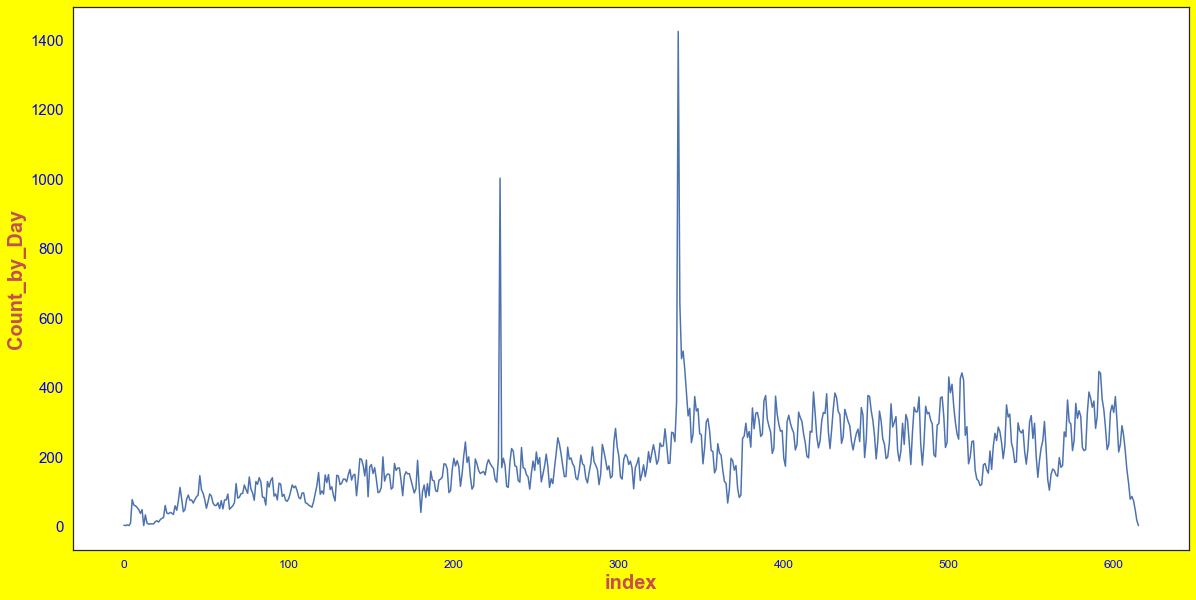

In [73]:
plt.figure(figsize=(20,10),facecolor='yellow')
sns.set(style='white')#plt.axes().set_facecolor('white')
sns.lineplot(x=p.index,y=p.Count_by_Day,palette='bright')
plt.ylabel('Count_by_Day',fontsize=20,color='r',fontweight='bold')
plt.xlabel('index',fontsize=20,color='r',fontweight='bold')
plt.xticks(rotation=0,fontsize=12,color='blue')
plt.yticks(rotation=0,fontsize=15,color='blue')
plt.grid(False)
plt.show()

**Sales by Time Wise**

In [74]:
p=(df.pivot_table(index='Time',values='payment_value',aggfunc='sum')).\
rename({'payment_value':'Sum_by_Time'},axis=1)
p.head(10)

,Sum_by_Time
Time,
00:00:00,7594.380
00:01:00,7499.540
00:02:00,6356.935
00:03:00,8192.030
00:04:00,10964.885
00:05:00,8903.105
00:06:00,7909.760
00:07:00,4828.520
00:08:00,12003.360


**Quantity by Time Wise**

In [75]:
(df.pivot_table(index='Time',values='payment_value',aggfunc='count')).\
rename({'payment_value':'Count_by_Time'},axis=1)

,Count_by_Time
Time,
00:00:00,54
00:01:00,60
00:02:00,46
00:03:00,67
00:04:00,72
...,...
23:55:00,73
23:56:00,72
23:57:00,58


**Popular Products by month**

In [76]:
a=df.groupby(['Year_month',df.product_id.rename('Product')])[['customer_unique_id']].count().\
sort_values(by=['Year_month','customer_unique_id'],ascending=(True,False)).groupby('Year_month').head(5).\
reset_index().rename({'customer_unique_id':'Count'},axis=1)
a

,Year_month,Product,Count
0,2016-09,5a6b04657a4c5ee34285d1e4619a96b4,3
1,2016-09,c1488892604e4ba5cff5b4eb4d595400,1
2,2016-09,f293394c72c9b5fafd7023301fc21fc2,1
3,2016-09,f3c2d01a84c947b078e32bbef0718962,1
4,2016-10,eba7488e1c67729f045ab43fac426f2e,11
...,...,...,...
106,2018-08,73326828aa5efe1ba096223de496f596,56
107,2018-08,19c91ef95d509ea33eda93495c4d3481,32
108,2018-08,2bd9b51a9ab079e095aca987845d3266,29
109,2018-08,a92930c327948861c015c919a0bcb4a8,29


**Popular Products by seller**

In [77]:
df.groupby(['seller_id',df.product_id.rename('Product')])[['customer_unique_id']].\
count().sort_values(by=['seller_id','customer_unique_id'],ascending=(False,False)).groupby('seller_id').head(5).\
reset_index().rename({'customer_unique_id':'Count'},axis=1)


,seller_id,Product,Count
0,ffff564a4f9085cd26170f4732393726,8f7a3322e1abfed89ac080b0f7364779,2
1,ffff564a4f9085cd26170f4732393726,96aca2f53bcaed6f466449f7fb18ae75,2
2,ffff564a4f9085cd26170f4732393726,c4b925e40f11289063a854c47aaef129,2
3,ffff564a4f9085cd26170f4732393726,c5897f6f2d995196dbb40542439da9b9,2
4,ffff564a4f9085cd26170f4732393726,dbd024d4182504993ad1e3cd2ee9d9e9,2
...,...,...,...
10367,001cca7ae9ae17fb1caed9dfb1094831,e251ebd2858be1aa7d9b2087a6992580,48
10368,001cca7ae9ae17fb1caed9dfb1094831,98a8c2fa16d7239c606640f5555768e4,30
10369,001cca7ae9ae17fb1caed9dfb1094831,0da9ffd92214425d880de3f94e74ce39,17
10370,001cca7ae9ae17fb1caed9dfb1094831,547b95702aec86f05ac37e61d164891c,17


**Popular Products by state**

In [78]:
df.groupby(['customer_state',df.product_id.rename('Product')])[['customer_unique_id']].count().\
sort_values(by=['customer_state','customer_unique_id'],ascending=(False,False)).groupby('customer_state').head(5).\
reset_index().rename({'customer_unique_id':'Count'},axis=1)

,customer_state,Product,Count
0,West Bengal,99a4788cb24856965c36a24e339b6058,6
1,West Bengal,30ac6df06dc59ad72cf2f158fc2d904c,5
2,West Bengal,389d119b48cf3043d311335e499d9c6b,5
3,West Bengal,2028bf1b01cafb2d2b1901fca4083222,4
4,West Bengal,aca2eb7d00ea1a7b8ebd4e68314663af,4
...,...,...,...
95,Andhra Pradesh,aca2eb7d00ea1a7b8ebd4e68314663af,813
96,Andhra Pradesh,99a4788cb24856965c36a24e339b6058,322
97,Andhra Pradesh,422879e10f46682990de24d770e7f83d,302
98,Andhra Pradesh,389d119b48cf3043d311335e499d9c6b,226


**Popular Products by category**

In [79]:
df.groupby(['product_category_name',df.product_id.rename('Product')])[['customer_unique_id']].count().\
sort_values(by=['product_category_name','customer_unique_id'],ascending=(True,False)).groupby('product_category_name').head(5).\
reset_index().rename({'product_category_name':'Category','customer_unique_id':'Count'},axis=1)

,Category,Product,Count
0,Agro_Industry_And_Commerce,11250b0d4b709fee92441c5f34122aed,44
1,Agro_Industry_And_Commerce,423a6644f0aa529e8828ff1f91003690,19
2,Agro_Industry_And_Commerce,672e757f331900b9deea127a2a7b79fd,17
3,Agro_Industry_And_Commerce,07f01b6fcacc1b187a71e5074199db2d,15
4,Agro_Industry_And_Commerce,a0fe1efb855f3e786f0650268cd77f44,15
...,...,...,...
343,Watches_Gifts,53b36df67ebb7c41585e8d54d6772e08,327
344,Watches_Gifts,a62e25e09e05e6faf31d90c6ec1aa3d1,228
345,Watches_Gifts,e0d64dcfaa3b6db5c54ca298ae101d05,202
346,Watches_Gifts,a92930c327948861c015c919a0bcb4a8,164


**Popularised categories by state**

In [80]:
df.groupby([df.customer_state.rename('State'),df.product_category_name.rename('Category')])[['customer_unique_id']].count().\
sort_values(by=['State','customer_unique_id'],ascending=(True,False)).groupby('State').head(5).\
reset_index().rename({'customer_unique_id':'Count'},axis=1)

,State,Category,Count
0,Andhra Pradesh,Bed_Bath_Table,9347
1,Andhra Pradesh,Health_Beauty,6234
2,Andhra Pradesh,Furniture_Decor,5579
3,Andhra Pradesh,Sports_Leisure,5568
4,Andhra Pradesh,Computers_Accessories,5067
...,...,...,...
95,West Bengal,Health_Beauty,45
96,West Bengal,Bed_Bath_Table,44
97,West Bengal,Telephony,34
98,West Bengal,Computers_Accessories,33


**Popularised categories by Month**

In [81]:
a=df.groupby([df.Year_month.rename('Year_month'),df.product_category_name.rename('Category')])[['customer_unique_id']].count().\
sort_values(by=['Year_month','customer_unique_id'],ascending=(True,False)).groupby('Year_month').head(5).\
reset_index().rename({'customer_unique_id':'Count'},axis=1)
a

,Year_month,Category,Count
0,2016-09,Health_Beauty,3
1,2016-09,Furniture_Decor,2
2,2016-09,Telephony,1
3,2016-10,Furniture_Decor,80
4,2016-10,Health_Beauty,50
...,...,...,...
105,2018-08,Bed_Bath_Table,714
106,2018-08,Housewares,650
107,2018-08,Sports_Leisure,481
108,2018-08,Furniture_Decor,461


**Listed  top 10 most expensive products sorted by price**

In [82]:
a=df.groupby('product_id')[['payment_value']].agg({'sum','count'})
a['Avg_Price']=a.payment_value['sum']/a.payment_value['count']
a.sort_values('Avg_Price',ascending=False).reset_index().head(10)

product_id payment_value       Avg_Price
                                              sum count          
0  424471a68d6b1ae4a53d39723e6981d3       379.985     1   379.985
1  981ded16f0a16ee18baf49b12796399a       379.985     1   379.985
2  97b5158053e671771fe7c85ec69ee043       759.970     2   379.985
3  23713b3af0ec6a3c9601da5c58b2ea95       379.985     1   379.985
4  236fdb1c273caaa9a7dbff8111e6a4e1       379.985     1   379.985
5  97c57b8428f6b7a7597248a02938681d       759.970     2   379.985
6  97dd14dcd2c85f01c271127d6413f2d8       759.970     2   379.985
7  d6b80738418fd3491b89c8d2cf5f8256       379.985     1   379.985
8  980a05f1865790c75cf9a22ae4771c1c       379.985     1   379.985
9  d6b4d1a0d7b4224aa86e3ceff1d78217      1519.940     4   379.985

# 2. Performing Customers/sellers Segmentation

**Divided the customers into groups based on the revenue generated**

In [83]:
a=df.groupby('customer_id')[['payment_value']].agg('sum').reset_index().sort_values('payment_value',ascending=False).reset_index().drop('index',axis=1)
a['Income_Level']=pd.qcut(a.payment_value,q=5,duplicates='drop',labels=['Very Low level  Customer','Low level  Customer','Medium level  Customer','High level  Customer','Very High level  Customer'])
a

,customer_id,payment_value,Income_Level
0,be1c4e52bb71e0c54b11a26b8e8d59f2,8359.670,Very High level Customer
1,be1b70680b9f9694d8c70f41fa3dc92b,7599.700,Very High level Customer
2,bd5d39761aa56689a265d95d8d32b8be,7599.700,Very High level Customer
3,adb32467ecc74b53576d9d13a5a55891,5699.775,Very High level Customer
4,10de381f8a8d23fff822753305f71cae,5699.775,Very High level Customer
...,...,...,...
99436,d2c63ad286e3ca9dd69218008d61ff81,11.620,Very Low level Customer
99437,046f890135acc703faff4c1fc0c2d73c,11.560,Very Low level Customer
99438,8e4bd65db637116b6b68109e4df21b84,10.890,Very Low level Customer
99439,184e8e8e48937145eb96c721ef1f0747,10.070,Very Low level Customer


In [84]:
a=df.groupby('customer_id')[['payment_value']].agg('sum').reset_index().sort_values('payment_value',ascending=False).reset_index().drop('index',axis=1)
a['Deciles']=pd.qcut(a.payment_value,q=10,duplicates='drop',labels=False)
a

,customer_id,payment_value,Deciles
0,be1c4e52bb71e0c54b11a26b8e8d59f2,8359.670,9
1,be1b70680b9f9694d8c70f41fa3dc92b,7599.700,9
2,bd5d39761aa56689a265d95d8d32b8be,7599.700,9
3,adb32467ecc74b53576d9d13a5a55891,5699.775,9
4,10de381f8a8d23fff822753305f71cae,5699.775,9
...,...,...,...
99436,d2c63ad286e3ca9dd69218008d61ff81,11.620,0
99437,046f890135acc703faff4c1fc0c2d73c,11.560,0
99438,8e4bd65db637116b6b68109e4df21b84,10.890,0
99439,184e8e8e48937145eb96c721ef1f0747,10.070,0


**Divided the sellers into groups based on the revenue generated**

**Here i have taken Price because in seller revenue doesn't include freight_value**

In [85]:
a=df.groupby('seller_id')[['price']].agg('sum').reset_index().sort_values('price',ascending=False).reset_index().drop('index',axis=1)
a['Income_Level']=pd.qcut(a.price,q=5,duplicates='drop',labels=['Very Low level  Sellers','Low level  Sellers','Medium level Sellers','High level Sellers','Very High level Sellers'])
a

,seller_id,price,Income_Level
0,4a3ca9315b744ce9f8e9374361493884,269779.07,Very High level Sellers
1,4869f7a5dfa277a7dca6462dcf3b52b2,209840.85,Very High level Sellers
2,7c67e1448b00f6e969d365cea6b010ab,199129.69,Very High level Sellers
3,da8622b14eb17ae2831f4ac5b9dab84a,170282.57,Very High level Sellers
4,7a67c85e85bb2ce8582c35f2203ad736,150749.79,Very High level Sellers
...,...,...,...
3090,ad14615bdd492b01b0d97922e87cb87f,8.25,Very Low level Sellers
3091,702835e4b785b67a084280efca355756,7.60,Very Low level Sellers
3092,1fa2d3def6adfa70e58c276bb64fe5bb,6.90,Very Low level Sellers
3093,77128dec4bec4878c37ab7d6169d6f26,6.50,Very Low level Sellers


In [86]:
a=df.groupby('seller_id')[['price']].agg('sum').reset_index().sort_values('price',ascending=False).reset_index().drop('index',axis=1)
a['Deciles']=pd.qcut(a.price,q=10,duplicates='drop',labels=False)
a

,seller_id,price,Deciles
0,4a3ca9315b744ce9f8e9374361493884,269779.07,9
1,4869f7a5dfa277a7dca6462dcf3b52b2,209840.85,9
2,7c67e1448b00f6e969d365cea6b010ab,199129.69,9
3,da8622b14eb17ae2831f4ac5b9dab84a,170282.57,9
4,7a67c85e85bb2ce8582c35f2203ad736,150749.79,9
...,...,...,...
3090,ad14615bdd492b01b0d97922e87cb87f,8.25,0
3091,702835e4b785b67a084280efca355756,7.60,0
3092,1fa2d3def6adfa70e58c276bb64fe5bb,6.90,0
3093,77128dec4bec4878c37ab7d6169d6f26,6.50,0


# 3. Cross-Selling (Which products are selling together)

In [87]:
df.pivot_table(index='customer_unique_id',columns='product_category_name',values='price',aggfunc='count',margins=True,margins_name='Count').fillna(0)

product_category_name,Agro_Industry_And_Commerce,Air_Conditioning,Art,Arts_And_Craftmanship,Audio,Auto,Baby,Bed_Bath_Table,Books_General_Interest,Books_Imported,Books_Technical,Cds_Dvds_Musicals,Christmas_Supplies,Cine_Photo,Computers,Computers_Accessories,Consoles_Games,Construction_Tools_Construction,Construction_Tools_Lights,Construction_Tools_Safety,Cool_Stuff,Costruction_Tools_Garden,Costruction_Tools_Tools,Diapers_And_Hygiene,Drinks,Dvds_Blu_Ray,Electronics,Fashio_Female_Clothing,Fashion_Bags_Accessories,Fashion_Childrens_Clothes,Fashion_Male_Clothing,Fashion_Shoes,Fashion_Sport,Fashion_Underwear_Beach,Fixed_Telephony,Flowers,Food,Food_Drink,Furniture_Bedroom,Furniture_Decor,Furniture_Living_Room,Furniture_Mattress_And_Upholstery,Garden_Tools,Health_Beauty,Home_Appliances,Home_Appliances_2,Home_Comfort_2,Home_Confort,Home_Construction,Housewares,Industry_Commerce_And_Business,Kitchen_Dining_Laundry_Garden_Furniture,La_Cuisine,Luggage_Accessories,Market_Place,Music,Musical_Instruments,Office_Furniture,Party_Supplies,Perfumery,Pet_Shop,Security_And_Services,Signaling_And_Security,Small_Appliances,Small_Appliances_Home_Oven_And_Coffee,Sports_Leisure,Stationery,Tablets_Printing_Image,Telephony,Toys,Watches_Gifts,Count
customer_unique_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0000366f3b9a7992bf8c76cfdf3221e2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
0000b849f77a49e4a4ce2b2a4ca5be3f,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
0000f46a3911fa3c0805444483337064,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1
0000f6ccb0745a6a4b88665a16c9f078,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1
0004aac84e0df4da2b147fca70cf8255,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
fffea47cd6d3cc0a88bd621562a9d061,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
ffff371b4d645b6ecea244b27531430a,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
ffff5962728ec6157033ef9805bacc48,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0

In [88]:
b= df[df["order_id"].duplicated(keep=False)]
c= b[["order_id","product_id"]]
c

,order_id,product_id
18,17825f24877a9289214c301ae0c9424b,99a4788cb24856965c36a24e339b6058
19,17825f24877a9289214c301ae0c9424b,99a4788cb24856965c36a24e339b6058
22,aaff8afa47c8426e414a6d908a97713c,368c6c730842d78016ad823897a372db
23,aaff8afa47c8426e414a6d908a97713c,368c6c730842d78016ad823897a372db
24,aaff8afa47c8426e414a6d908a97713c,368c6c730842d78016ad823897a372db
...,...,...
119076,e86b1b2dd48839d7351406434afb578d,5d66715cc928aadd0074f61332698593
119079,51c6d2f460589fa7b65f2da51e860206,c98bf47f7bea8f3aee82fa023786b8a1
119080,51c6d2f460589fa7b65f2da51e860206,c98bf47f7bea8f3aee82fa023786b8a1
119084,ec3a75fb0ac595e461765d2d854b1d08,6b5af19067eeadc0f331687a79ca656b


In [89]:
c["Grouped"] = c.groupby("order_id")[["product_id"]].transform(lambda x : "," . join(x))

In [90]:
d=c[c["order_id"].duplicated(keep=False)]
d[['order_id','Grouped']].reset_index().drop('index',axis=1)

,order_id,Grouped
0,17825f24877a9289214c301ae0c9424b,"99a4788cb24856965c36a24e339b6058,99a4788cb2485..."
1,17825f24877a9289214c301ae0c9424b,"99a4788cb24856965c36a24e339b6058,99a4788cb2485..."
2,aaff8afa47c8426e414a6d908a97713c,"368c6c730842d78016ad823897a372db,368c6c730842d..."
3,aaff8afa47c8426e414a6d908a97713c,"368c6c730842d78016ad823897a372db,368c6c730842d..."
4,aaff8afa47c8426e414a6d908a97713c,"368c6c730842d78016ad823897a372db,368c6c730842d..."
...,...,...
33349,e86b1b2dd48839d7351406434afb578d,"5d66715cc928aadd0074f61332698593,5d66715cc928a..."
33350,51c6d2f460589fa7b65f2da51e860206,"c98bf47f7bea8f3aee82fa023786b8a1,c98bf47f7bea8..."
33351,51c6d2f460589fa7b65f2da51e860206,"c98bf47f7bea8f3aee82fa023786b8a1,c98bf47f7bea8..."
33352,ec3a75fb0ac595e461765d2d854b1d08,"6b5af19067eeadc0f331687a79ca656b,6b5af19067eea..."


# Transfrming the data to be analysed by apriori algorithm

In [91]:
def apiro(z):
    for i in z.columns:
        z[i] = z[i].apply(lambda x: x > 0)
    return z


data = pd.crosstab(df.order_id, df.product_category_name)

data_apiro = apiro(data)

In [92]:
!pip install  mlxtend

In [93]:
from mlxtend.frequent_patterns import fpmax

In [94]:
fpmax(data_apiro, min_support=0.00001, use_colnames=True).itemsets.iloc[::-1].reset_index(drop=True)

0                        (Health_Beauty, Bed_Bath_Table)
1                       (Bed_Bath_Table, Sports_Leisure)
2                (Computers_Accessories, Bed_Bath_Table)
3      (Computers_Accessories, Health_Beauty, Sports_...
4                       (Furniture_Decor, Health_Beauty)
                             ...                        
224                           (Garden_Tools, La_Cuisine)
225                                   (Baby, La_Cuisine)
226                                  (Cds_Dvds_Musicals)
227    (Fashion_Bags_Accessories, Fashion_Childrens_C...
228                              (Security_And_Services)
Name: itemsets, Length: 229, dtype: object

# 4. Payment Behaviour

**How customers are paying**

In [95]:
a=df.pivot_table(index='payment_type',aggfunc=({'payment_value':'sum','customer_id':'count'})).\
reset_index().rename({'customer_id':'count','payment_value':'Total_Amount'},axis=1)
a[['payment_type']]

,payment_type
0,UPI
1,credit_card
2,debit_card
3,voucher


**payment channels are used by most customers**

In [96]:
a.sort_values(by=['Total_Amount','count'],ascending=(False,False))

,payment_type,count,Total_Amount
1,credit_card,88044,1.292082e+07
0,UPI,23018,3.219651e+06
3,voucher,6332,3.888203e+05
2,debit_card,1699,2.155005e+05


# 5. Customer satisfaction towards category & product

**These are the  categories (top 10) are maximum rated**

In [97]:
df.pivot_table(index='product_category_name',values='review_score',aggfunc='mean').\
rename({'review_score':'Mean_rating'},axis=1).\
sort_values(by=['Mean_rating'],ascending=(False)).head(10).reset_index()

,product_category_name,Mean_rating
0,Fashion_Childrens_Clothes,4.687500
1,Cds_Dvds_Musicals,4.642857
2,Books_Imported,4.572581
3,Books_General_Interest,4.550442
4,Costruction_Tools_Tools,4.495238
5,Books_Technical,4.490809
6,Small_Appliances_Home_Oven_And_Coffee,4.461538
7,Luggage_Accessories,4.423904
8,Food_Drink,4.419244
9,Cine_Photo,4.412162


**categories minimum rated**

In [98]:
df.pivot_table(index='product_category_name',values='review_score',aggfunc='mean').\
rename({'review_score':'Mean_rating'},axis=1).\
sort_values(by=['Mean_rating'],ascending=(True)).head(10).reset_index()

,product_category_name,Mean_rating
0,Security_And_Services,3.250000
1,Diapers_And_Hygiene,3.641026
2,Home_Comfort_2,3.838710
3,Office_Furniture,3.849553
4,Fashion_Male_Clothing,3.972414
5,Fashio_Female_Clothing,3.990000
6,Fixed_Telephony,3.992647
7,Furniture_Mattress_And_Upholstery,4.073171
8,Audio,4.098425
9,Furniture_Living_Room,4.109962


**Which products (top10) are maximum rated & minimum rated**

In [99]:
df.pivot_table(index='product_id',values='review_score',aggfunc='mean').\
rename({'review_score':'Mean_rating'},axis=1).\
sort_values(by=['Mean_rating'],ascending=(False)).head(10).reset_index()

,product_id,Mean_rating
0,00066f42aeeb9f3007548bb9d3f33c38,5.0
1,86743ff92eee3d16b7df59cddd583b8c,5.0
2,868ceb027ab706a4dee42e2220006b85,5.0
3,868969d3a93aeeab7bfcd4fc3d3d65de,5.0
4,868766ed2172644fdd977d6bd395a107,5.0
5,8684bd8f93b4f4038d07188a23811e93,5.0
6,867c96d2bb67aba6500a4c509cf76072,5.0
7,867b820367ec206b38a357f2c12454b7,5.0
8,867901d7e8488fb97f1fb538c09d476e,5.0
9,865bfa00c1dad8f4146d3c2765f051ca,5.0


**Which products minimum rated**

In [100]:
df.pivot_table(index='product_id',values='review_score',aggfunc='mean').\
rename({'review_score':'Mean_rating'},axis=1).\
sort_values(by=['Mean_rating'],ascending=(True)).head(10).reset_index()

,product_id,Mean_rating
0,592cc6634d2c783d297effc0b828bc37,2.5
1,cd70dc78e373501fa925b1b3195404f2,2.5
2,f649a2fc406930962c1cd7b147497a79,2.5
3,165b735d5e65bee3592afb5d43af3397,2.5
4,cd6d8b8b983f406dd1b95e3c1bf8a8a5,2.5
5,36eabbbffe429d2997d5bf9b40695335,2.5
6,36e89a9ec56f96288ea7fbb266132288,2.5
7,9a6c2e91127b124802b1c0474cd6a6ad,2.5
8,36e76b21975cb010ce431815283898dc,2.5
9,e8bb3d53d12c06cae6287143be1ce7ec,2.5


**Average rating by location**

In [101]:
df.pivot_table(index='customer_city',values='review_score',aggfunc='mean').\
rename({'review_score':'Mean_rating'},axis=1)

,Mean_rating
customer_city,
Aadityana,4.318182
Aambaliyasan,3.500000
Aantaliya,4.111111
Aarambhada,3.894231
Abiramam,5.000000
...,...
Zamin Uthukuli,4.000000
Ziauddin Pur,4.237654
Zira,4.600000


**Average rating by seller**

In [102]:
df.pivot_table(index='seller_id',values='review_score',aggfunc='mean').\
rename({'review_score':'Mean_rating'},axis=1)

,Mean_rating
seller_id,
0015a82c2db000af6aaaf3ae2ecb0532,4.166667
001cca7ae9ae17fb1caed9dfb1094831,4.130705
001e6ad469a905060d959994f1b41e4f,2.500000
002100f778ceb8431b7a1020ff7ab48f,4.220339
003554e2dce176b5555353e4f3555ac8,5.000000
...,...
ffcfefa19b08742c5d315f2791395ee5,2.500000
ffdd9f82b9a447f6f8d4b91554cc7dd3,4.404762
ffeee66ac5d5a62fe688b9d26f83f534,4.428571


**Average rating by product**

In [103]:
df.pivot_table(index='product_id',values='review_score',aggfunc='mean').\
rename({'review_score':'Mean_rating'},axis=1)

,Mean_rating
product_id,
00066f42aeeb9f3007548bb9d3f33c38,5.0
00088930e925c41fd95ebfe695fd2655,4.0
0009406fd7479715e4bef61dd91f2462,2.5
000b8f95fcb9e0096488278317764d19,5.0
000d9be29b5207b54e86aa1b1ac54872,5.0
...,...
fff6177642830a9a94a0f2cba5e476d1,4.5
fff81cc3158d2725c0655ab9ba0f712c,4.0
fff9553ac224cec9d15d49f5a263411f,5.0


**Average rating by category**

In [104]:
df.pivot_table(index='product_category_name',values='review_score',aggfunc='mean').\
rename({'review_score':'Mean_rating'},axis=1)

,Mean_rating
product_category_name,
Agro_Industry_And_Commerce,4.325397
Air_Conditioning,4.177152
Art,4.166667
Arts_And_Craftmanship,4.312500
Audio,4.098425
...,...
Stationery,4.342857
Tablets_Printing_Image,4.201149
Telephony,4.154147


**Average rating by month**

In [105]:
df.pivot_table(index='Year_month',values='review_score',aggfunc='mean').\
rename({'review_score':'Mean_rating'},axis=1)

,Mean_rating
Year_month,
2016-09,2.500000
2016-10,3.980570
2016-12,5.000000
2017-01,4.282991
2017-02,4.233237
2017-03,4.236645
2017-04,4.181390
2017-05,4.291451
2017-06,4.288985
